## About The Data Set
We are required to model `y` with the available independent variables `id`, `x1`, `x2`, `x3`, `x4`, `x5`, `x6`, `x7`, `x8`, `x9`, `x10`, `x11`, `x12`, `x13`, `x14`, `x15`.

#### The steps which we will be basically following:

1. [Step 1: Reading and Understanding the Data](#1)
1.  [Step 2: Cleaning the Data](#2)
    - Missing Value check
    - Data type check
    - Duplicate check
1. [Step 3: Data Visualization](#3)
    - Boxplot
    - Pairplot
1. [Step 4: Data Preparation](#4) 
   - Dummy Variable (If any)
1. [Step 5: Splitting the Data into Training and Testing Sets](#5)
   - Rescaling
1. [Step 6: Building a Linear Model](#6)
   - Forward Model Selection
    - Manually Picking variable based on R^2 Score
    - Computer Based picking based on Cp, AIC, BIC and Adj. R^2
   - Backward Model Selection
    - RFE
    - VIF
1. [Step 7: Residual Analysis of the train data](#7)
1. [Step 8: Making Predictions Using the Final Model](#8)
1. [Step 9: Model Evaluation](#8)
   - RMSE Score

## Step 1 : Reading and Understanding the Data

In [1]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta

%matplotlib inline
plt.style.use('ggplot')

# import all libraries and dependencies for data visualization
pd.options.display.float_format='{:.4f}'.format
plt.rcParams['figure.figsize'] = [8,8]
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', -1) 
sns.set(style='darkgrid')
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker

# import all libraries and dependencies for machine learning
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# Reading the team-13.csv file on which analysis needs to be done
df = pd.read_csv("Team-13.csv")
#df.set_index("id", inplace=True)
df.head()

,id,x1,x2,x3,x4,x5,x6,x7,x8,y,x9,x10,x11,x12,x13,x14,x15
0,1,Los_Angeles,CA,4060,8863164,32.1000,9.7000,23677,27700,688936,70.0000,22.3000,11.6000,8.0000,20786,184230,4
1,2,Cook,IL,946,5105067,29.2000,12.4000,15153,21550,436936,73.4000,22.8000,11.1000,7.2000,21729,110928,2
2,3,Harris,TX,1729,2818199,31.3000,7.1000,7553,12449,253526,74.9000,25.4000,12.5000,5.7000,19517,55003,3
3,4,San_Diego,CA,4205,2498016,33.5000,10.9000,5905,6179,173821,81.9000,25.3000,8.1000,6.1000,19588,48931,4
4,5,Orange,CA,790,2410556,32.6000,9.2000,6062,6369,144524,81.2000,27.8000,5.2000,4.8000,24400,58818,4


### Understanding the dataframe

In [3]:
# shape of the data
df.shape

(440, 17)

In [4]:
# information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      440 non-null    int64  
 1   x1      440 non-null    object 
 2   x2      440 non-null    object 
 3   x3      440 non-null    int64  
 4   x4      440 non-null    int64  
 5   x5      440 non-null    float64
 6   x6      440 non-null    float64
 7   x7      440 non-null    int64  
 8   x8      440 non-null    int64  
 9   y       440 non-null    int64  
 10  x9      440 non-null    float64
 11  x10     440 non-null    float64
 12  x11     440 non-null    float64
 13  x12     440 non-null    float64
 14  x13     440 non-null    int64  
 15  x14     440 non-null    int64  
 16  x15     440 non-null    int64  
dtypes: float64(6), int64(9), object(2)
memory usage: 58.6+ KB


In [5]:
# description of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,440.0000,220.5000,127.1613,1.0000,110.7500,220.5000,330.2500,440.0000
x3,440.0000,1041.4114,1549.9221,15.0000,451.2500,656.5000,946.7500,20062.0000
x4,440.0000,393010.9205,601987.0165,100043.0000,139027.2500,217280.5000,436064.5000,8863164.0000
x5,440.0000,28.5684,4.1911,16.4000,26.2000,28.1000,30.0250,49.7000
x6,440.0000,12.1698,3.9927,3.0000,9.8750,11.7500,13.6250,33.8000
x7,440.0000,987.9977,1789.7495,39.0000,182.7500,401.0000,1036.0000,23677.0000
x8,440.0000,1458.6273,2289.1341,92.0000,390.7500,755.0000,1575.7500,27700.0000
y,440.0000,27111.6182,58237.5064,563.0000,6219.5000,11820.5000,26279.5000,688936.0000
x9,440.0000,77.5607,7.0152,46.6000,73.8750,77.7000,82.4000,92.9000
x10,440.0000,21.0811,7.6545,8.1000,15.2750,19.7000,25.3250,52.3000


In [6]:
df.dtypes

id     int64  
x1     object 
x2     object 
x3     int64  
x4     int64  
x5     float64
x6     float64
x7     int64  
x8     int64  
y      int64  
x9     float64
x10    float64
x11    float64
x12    float64
x13    int64  
x14    int64  
x15    int64  
dtype: object

## Step 2: Cleaning the Data

We need to do some basic cleansing activity in order to feed our model the correct data.

In [7]:
# dropping id based on business knowledge

df1 = df.drop('id',axis=1)

In [8]:
# Checking the number of unique value in each culumns

df1.nunique()

x1     373
x2     48 
x3     384
x4     440
x5     149
x6     137
x7     360
x8     391
y      437
x9     223
x10    220
x11    155
x12    97 
x13    436
x14    428
x15    4  
dtype: int64

In [9]:
# Checking the null value in each culumns

df1.isna().sum()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
y      0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
dtype: int64

In [10]:
# checking for duplicates rows

df1.loc[df1.duplicated()]

,x1,x2,x3,x4,x5,x6,x7,x8,y,x9,x10,x11,x12,x13,x14,x15


In [11]:
# dropping id based on business knowledge

df2 = df1.drop(['x1', 'x2'],axis=1)

In [12]:
df2.head()

,x3,x4,x5,x6,x7,x8,y,x9,x10,x11,x12,x13,x14,x15
0,4060,8863164,32.1000,9.7000,23677,27700,688936,70.0000,22.3000,11.6000,8.0000,20786,184230,4
1,946,5105067,29.2000,12.4000,15153,21550,436936,73.4000,22.8000,11.1000,7.2000,21729,110928,2
2,1729,2818199,31.3000,7.1000,7553,12449,253526,74.9000,25.4000,12.5000,5.7000,19517,55003,3
3,4205,2498016,33.5000,10.9000,5905,6179,173821,81.9000,25.3000,8.1000,6.1000,19588,48931,4
4,790,2410556,32.6000,9.2000,6062,6369,144524,81.2000,27.8000,5.2000,4.8000,24400,58818,4


## Step 3: Visualising the Data

Here we will identify if some predictors directly have a strong association with the outcome variable y

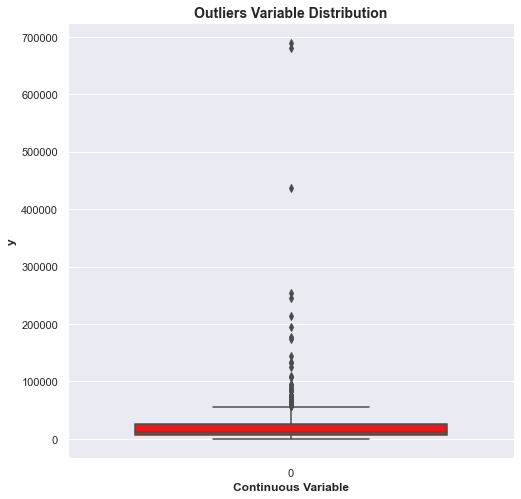

In [13]:
# Outlier Analysis of target variable y

plt.figure(figsize=(8,8))
sns.boxplot(data=df2['y'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("y", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
plt.show()

#### Insights: 
- There are some y value above 60000 which can be termed as outliers. So, let's remove the outliers.

#### Visualizing the distribution of y 

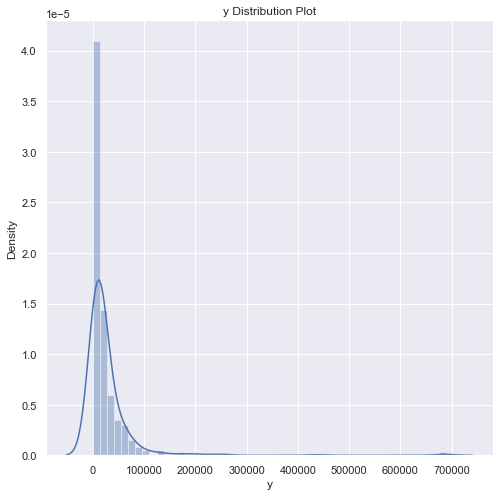

In [14]:
plt.figure(figsize=(8,8))

plt.title('y Distribution Plot')
sns.distplot(df2['y'])
plt.show()

* The plots seems to be right skewed, the value of y almost looks like less than 100000.

In [15]:
np.percentile(df2.y,[99.7])

array([603608.49])

In [16]:
np.percentile(df2.y,[99.7])[0]

603608.4899999982

In [17]:
upper_limit = np.percentile(df2.y,[99.7])[0]

In [18]:
df2[df2.y > upper_limit]

,x3,x4,x5,x6,x7,x8,y,x9,x10,x11,x12,x13,x14,x15
0,4060,8863164,32.1000,9.7000,23677,27700,688936,70.0000,22.3000,11.6000,8.0000,20786,184230,4
5,71,2300664,28.3000,12.4000,4861,8942,680966,63.7000,16.6000,19.5000,9.5000,16803,38658,1


In [19]:
df2.drop([0, 5],axis=0,inplace=True)

#### Visualising Numeric Variables

Pairplot of all the numeric variables

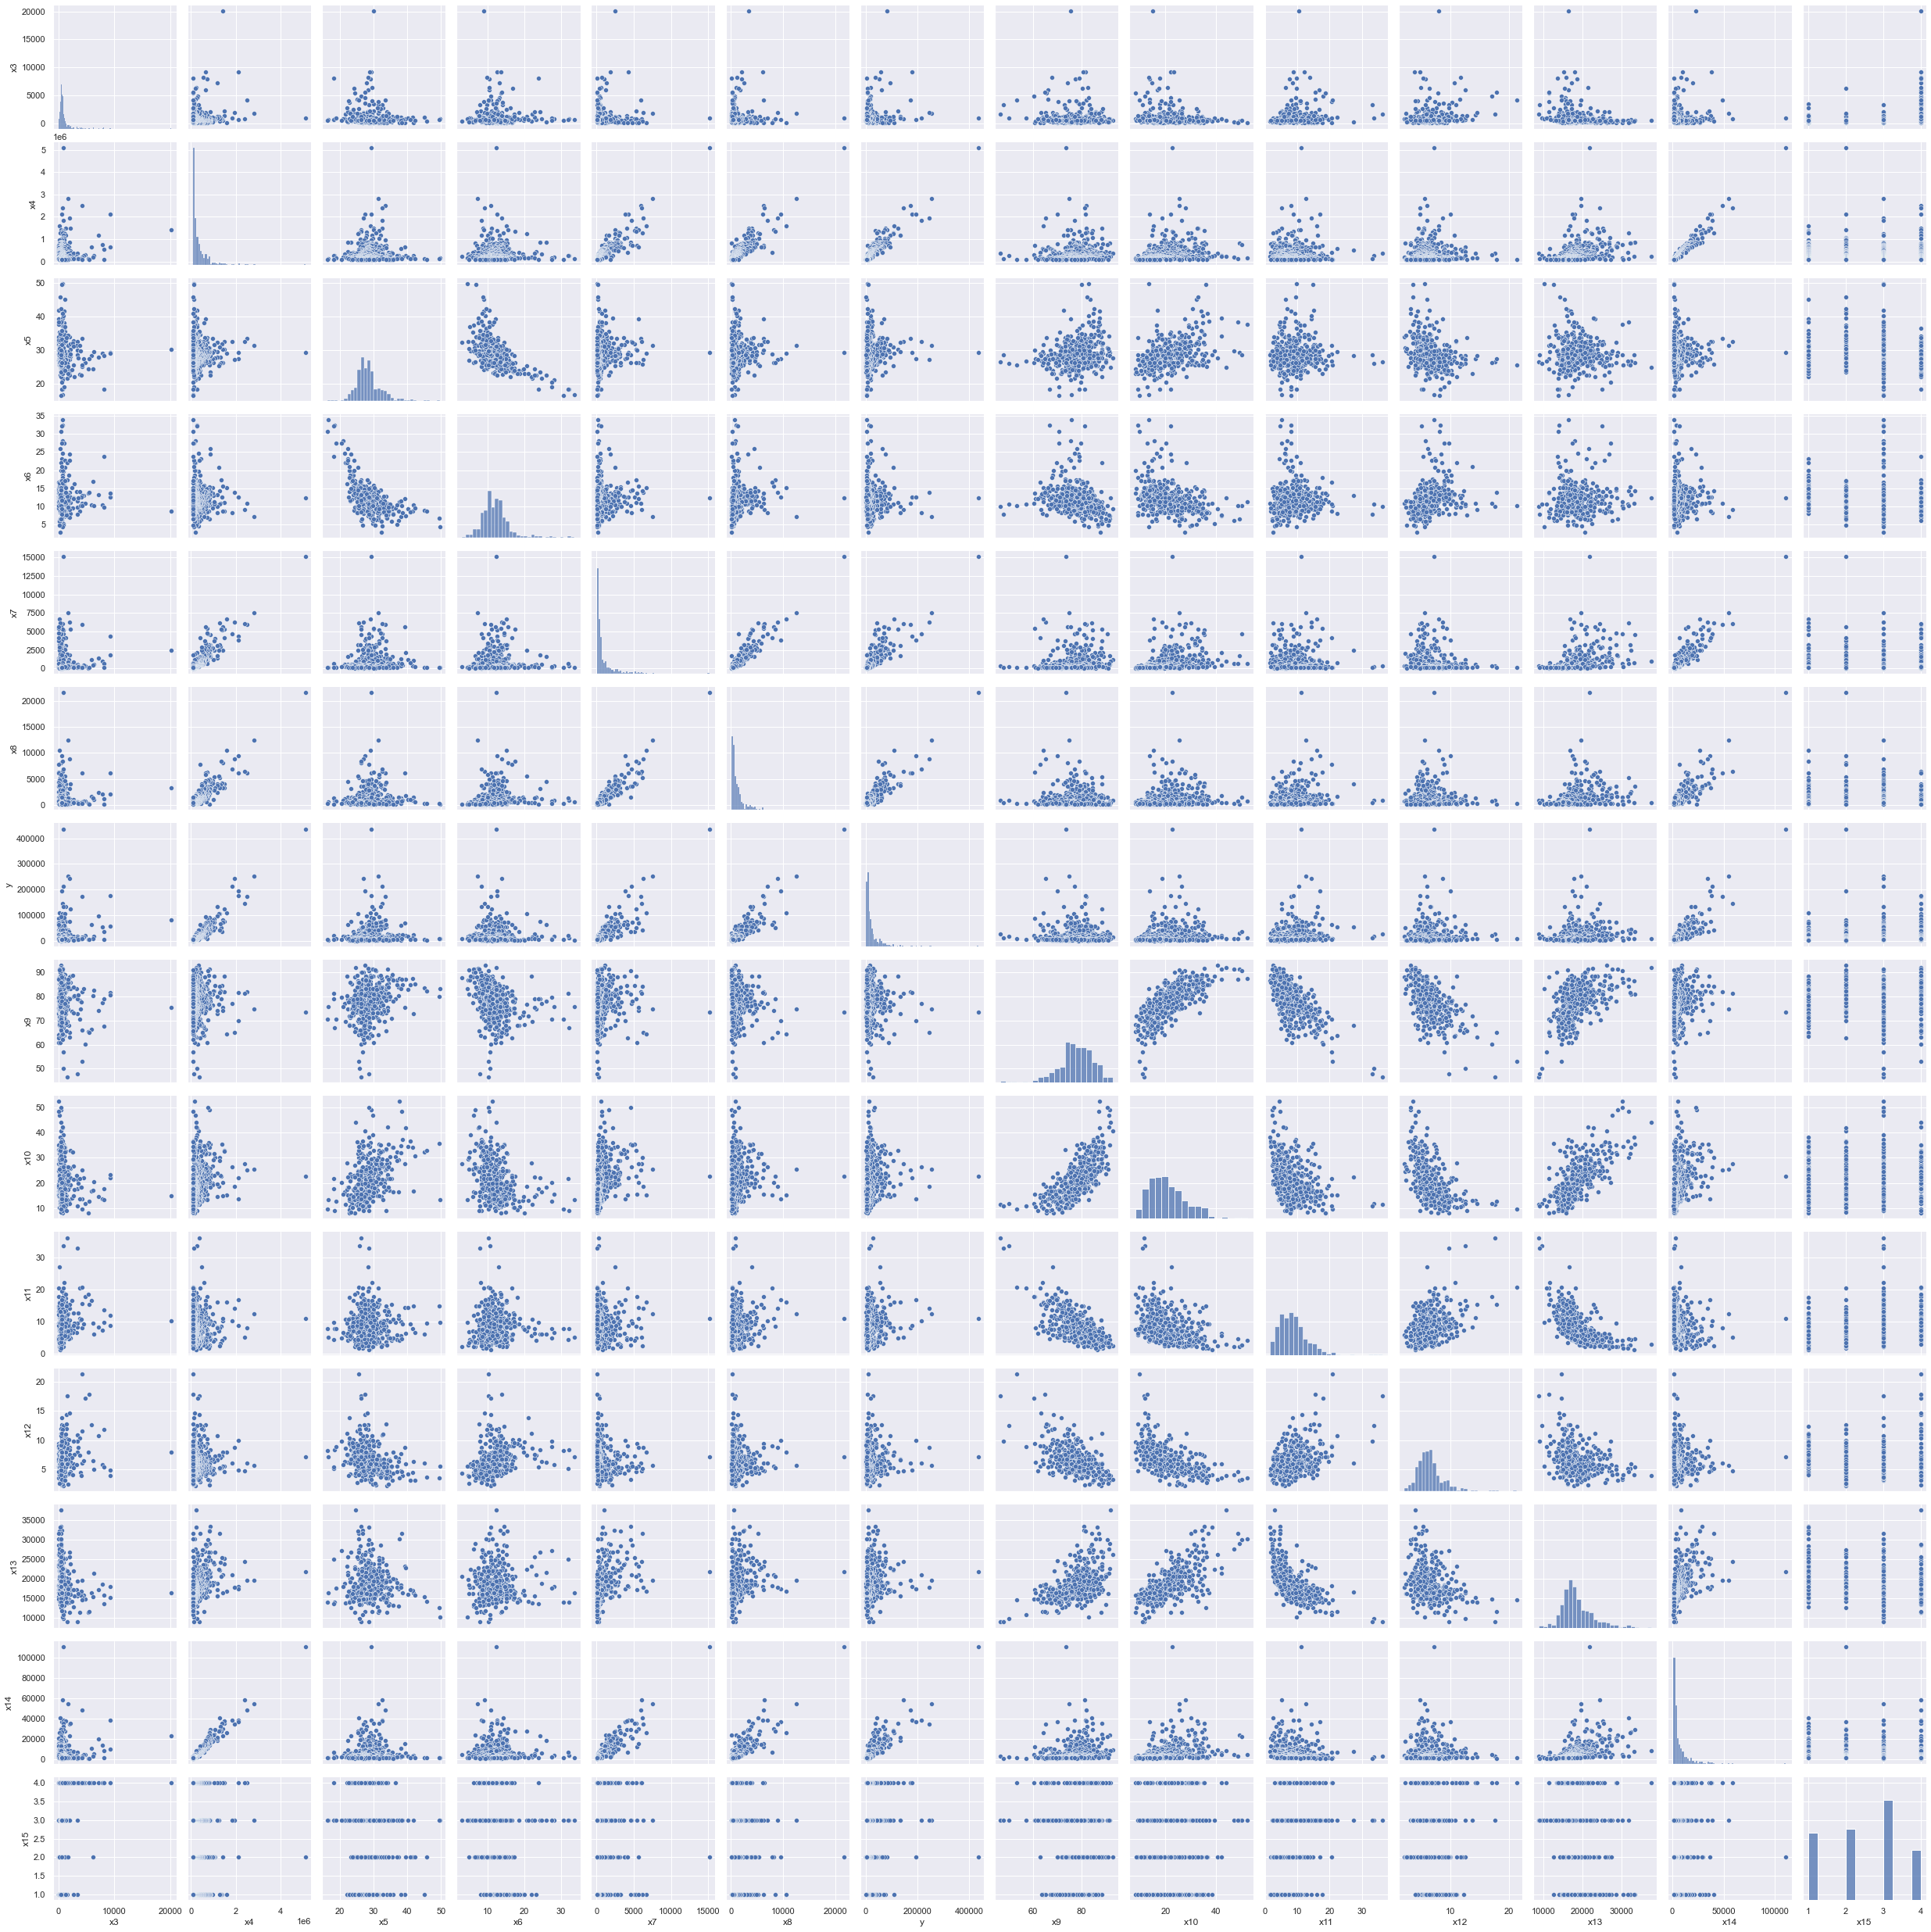

In [20]:
ax = sns.pairplot(df2)

#### Insights:
- y seems to have a poitive correlation with x4, x7, x8, and x14.
- Pair of any two of x4, x7, x8, and x14 are highly poitive correlated.
- x13 is positive correlation with x10 and x9.

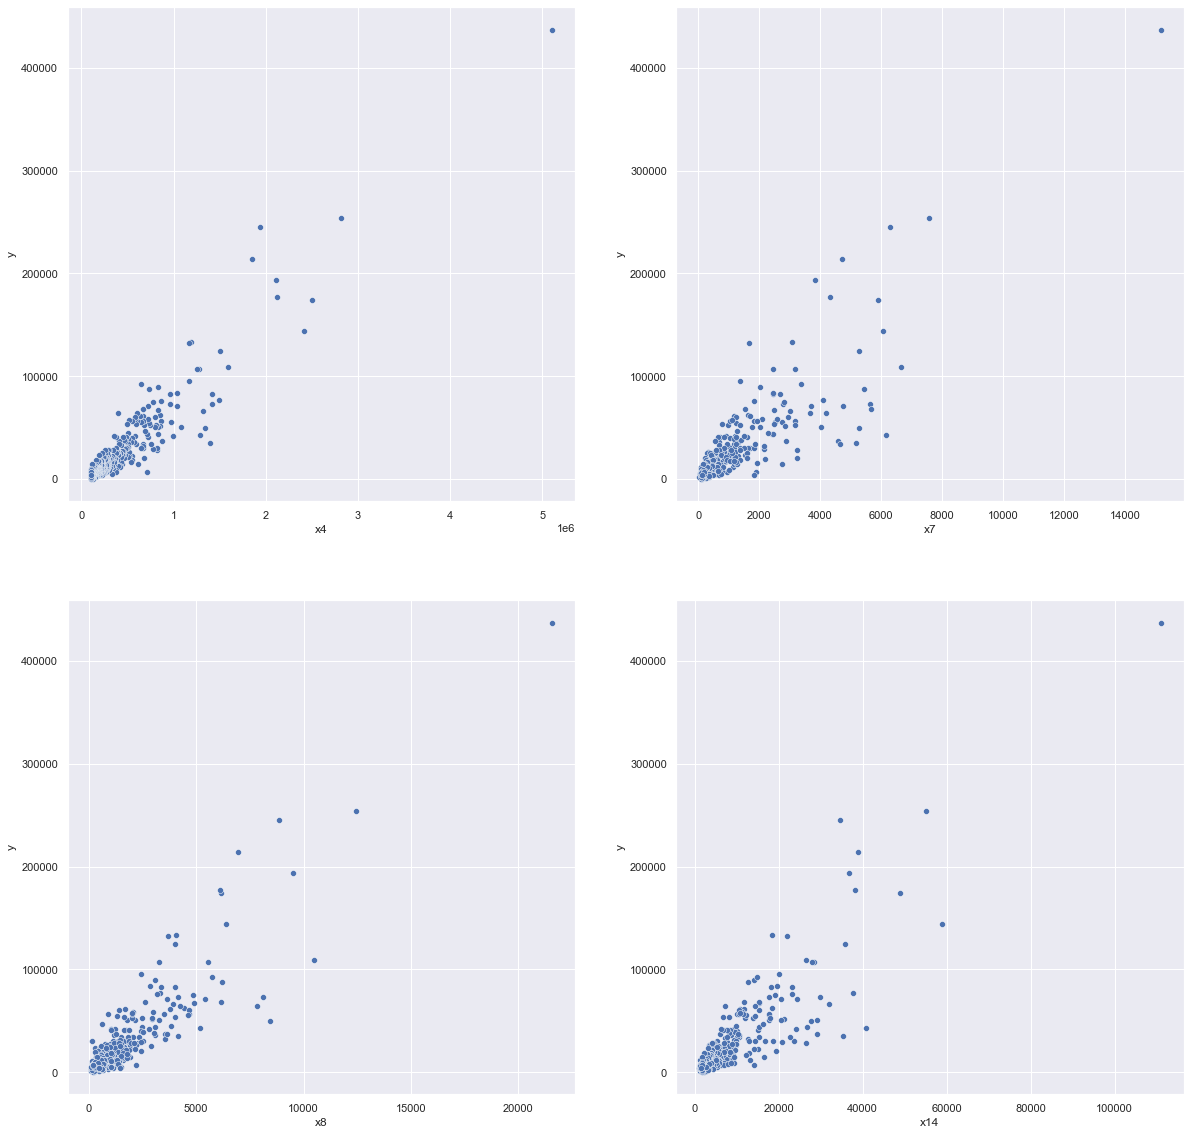

In [21]:
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
sns.scatterplot(x = 'x4', y = 'y', data = df2)
plt.subplot(2, 2, 2)
sns.scatterplot(x = 'x7', y = 'y', data = df2)
plt.subplot(2, 2, 3)
sns.scatterplot(x = 'x8', y = 'y', data = df2)
plt.subplot(2, 2, 4)
sns.scatterplot(x = 'x14', y = 'y', data = df2)
plt.show()

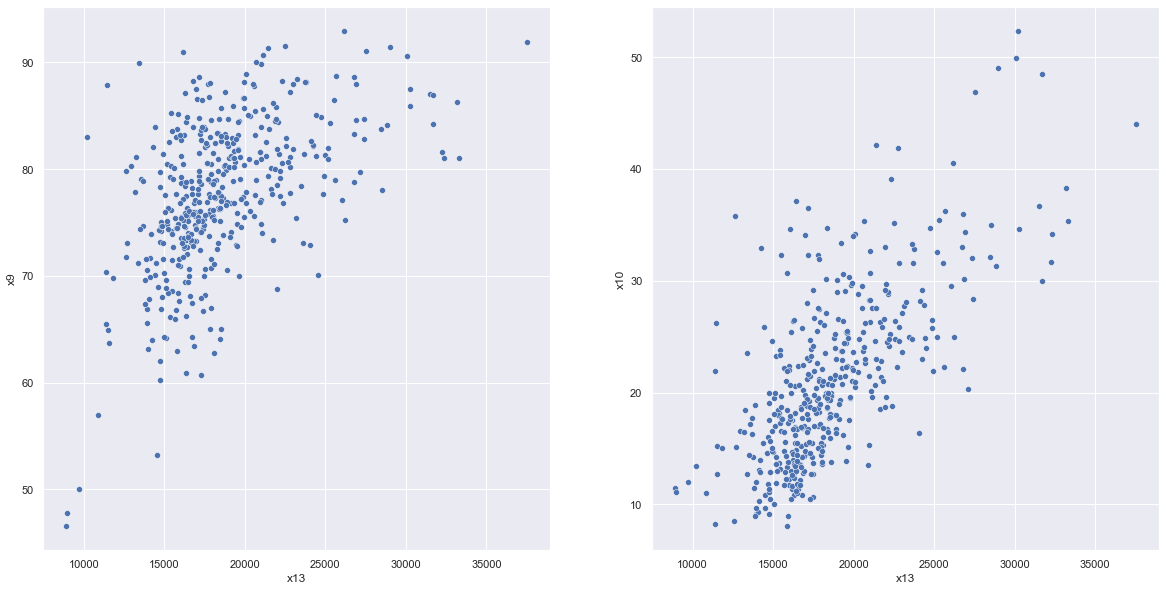

In [22]:
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'x13', y = 'x9', data = df2)
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'x13', y = 'x10', data = df2)
plt.show()

#### Deal with Multicollinearity:
* We can remove the highly correlated independent variables `x4`, `x7` and, `x8`.
* We can also remove `x10` and `x9`. They are highly correlated with `x13`.


##### Note:
- We will not remove any rows because the data set is small.

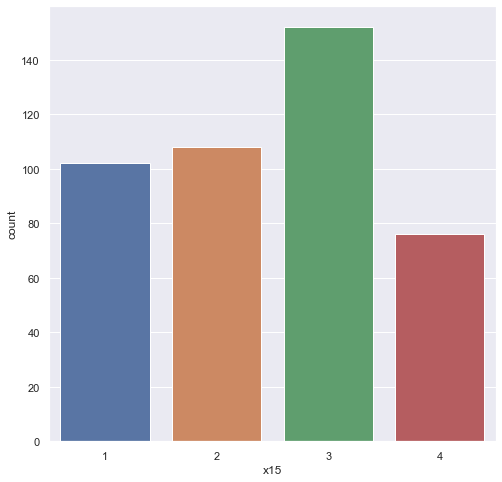

In [23]:
plt.figure(figsize=(8,8))
sns.countplot(x = 'x15', data = df2)
plt.show()

#### Insights:
- `x15` is a discreate column.
- Count of 3 is maximum and count of 4 is minimum.

#### Significant variables after Visualization
- `x3`, `x4`, `x5`, `x6`, `x7`, `x8`, `x9`, `x10`, `x11`, `x12`, `x13`, `x14`, `x15`, `y`

In [24]:
sig_col = ['x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'y']
df3 = df2[sig_col]

<a id="5"></a> <br>
## Step 5: Splitting the Data into Training and Testing Sets

As we know, the first basic step for regression is performing a train-test split.

In [25]:
df3.head()

,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
1,946,5105067,29.2000,12.4000,15153,21550,73.4000,22.8000,11.1000,7.2000,21729,110928,2,436936
2,1729,2818199,31.3000,7.1000,7553,12449,74.9000,25.4000,12.5000,5.7000,19517,55003,3,253526
3,4205,2498016,33.5000,10.9000,5905,6179,81.9000,25.3000,8.1000,6.1000,19588,48931,4,173821
4,790,2410556,32.6000,9.2000,6062,6369,81.2000,27.8000,5.2000,4.8000,24400,58818,4,144524
6,9204,2122101,29.2000,12.5000,4320,6104,81.5000,22.1000,8.8000,4.9000,18042,38287,4,177593


In [26]:
# We divide the df into 70/30 ratio

np.random.seed(0)
df_train, df_test = train_test_split(df3, train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
df_train.head()

,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
153,521,317471,27.8000,9.3000,473,1263,77.7000,21.4000,5.0000,7.5000,21684,6884,2,16721
262,868,178386,25.8000,13.8000,600,1330,81.8000,22.4000,7.2000,4.8000,19601,3497,2,11929
142,771,349660,28.5000,11.5000,1510,2785,79.0000,23.5000,10.5000,5.8000,18225,6373,3,42404
219,399,217399,26.9000,10.5000,950,1592,75.8000,19.3000,12.5000,7.0000,17744,3858,3,18586
119,1000,403662,28.5000,11.4000,930,1840,82.4000,22.2000,8.3000,4.5000,19276,7781,2,34071


### Rescaling the Features 

For Simple Linear Regression, scaling doesn't impact model. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients.
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Standardisation Scaling.

In [28]:
scaler = preprocessing.StandardScaler()

In [29]:
import warnings
warnings.filterwarnings("ignore")

df_train[sig_col] = scaler.fit_transform(df_train[sig_col])

In [30]:
df_train.head()

,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,y
153,-0.3257,-0.0934,-0.1884,-0.6830,-0.3035,-0.0417,0.0022,-0.0054,-0.7965,0.4880,0.7618,-0.0294,-0.4623,-0.1623
262,-0.1200,-0.4193,-0.6763,0.3842,-0.2134,-0.0054,0.5782,0.1230,-0.3133,-0.7345,0.2526,-0.3834,-0.4623,-0.3030
142,-0.1775,-0.0180,-0.0177,-0.1613,0.4318,0.7840,0.1849,0.2643,0.4115,-0.2817,-0.0838,-0.0828,0.5001,0.5916
219,-0.3980,-0.3279,-0.4080,-0.3984,0.0348,0.1368,-0.2647,-0.2750,0.8508,0.2616,-0.2014,-0.3456,0.5001,-0.1076
119,-0.0418,0.1085,-0.0177,-0.1850,0.0206,0.2713,0.6625,0.0974,-0.0717,-0.8704,0.1731,0.0643,-0.4623,0.3470


In [31]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
x3,306.0000,0.0000,1.0016,-0.6256,-0.3742,-0.2487,-0.0725,11.2569
x4,306.0000,0.0000,1.0016,-0.6028,-0.5083,-0.3375,0.1614,11.1216
x5,306.0000,-0.0000,1.0016,-2.9690,-0.5787,-0.0909,0.4457,5.0800
x6,306.0000,-0.0000,1.0016,-2.1771,-0.5407,-0.1376,0.3545,5.1272
x7,306.0000,0.0000,1.0016,-0.6112,-0.4988,-0.3666,0.0679,10.1053
x8,306.0000,-0.0000,1.0016,-0.6770,-0.5037,-0.3114,0.0832,10.9646
x9,306.0000,-0.0000,1.0016,-4.1982,-0.5140,0.0093,0.6871,2.1376
x10,306.0000,0.0000,1.0016,-1.7132,-0.7630,-0.1851,0.5500,3.9625
x11,306.0000,0.0000,1.0016,-1.4994,-0.7087,-0.1596,0.4719,5.5072
x12,306.0000,0.0000,1.0016,-1.9118,-0.6440,-0.1459,0.3974,6.7365


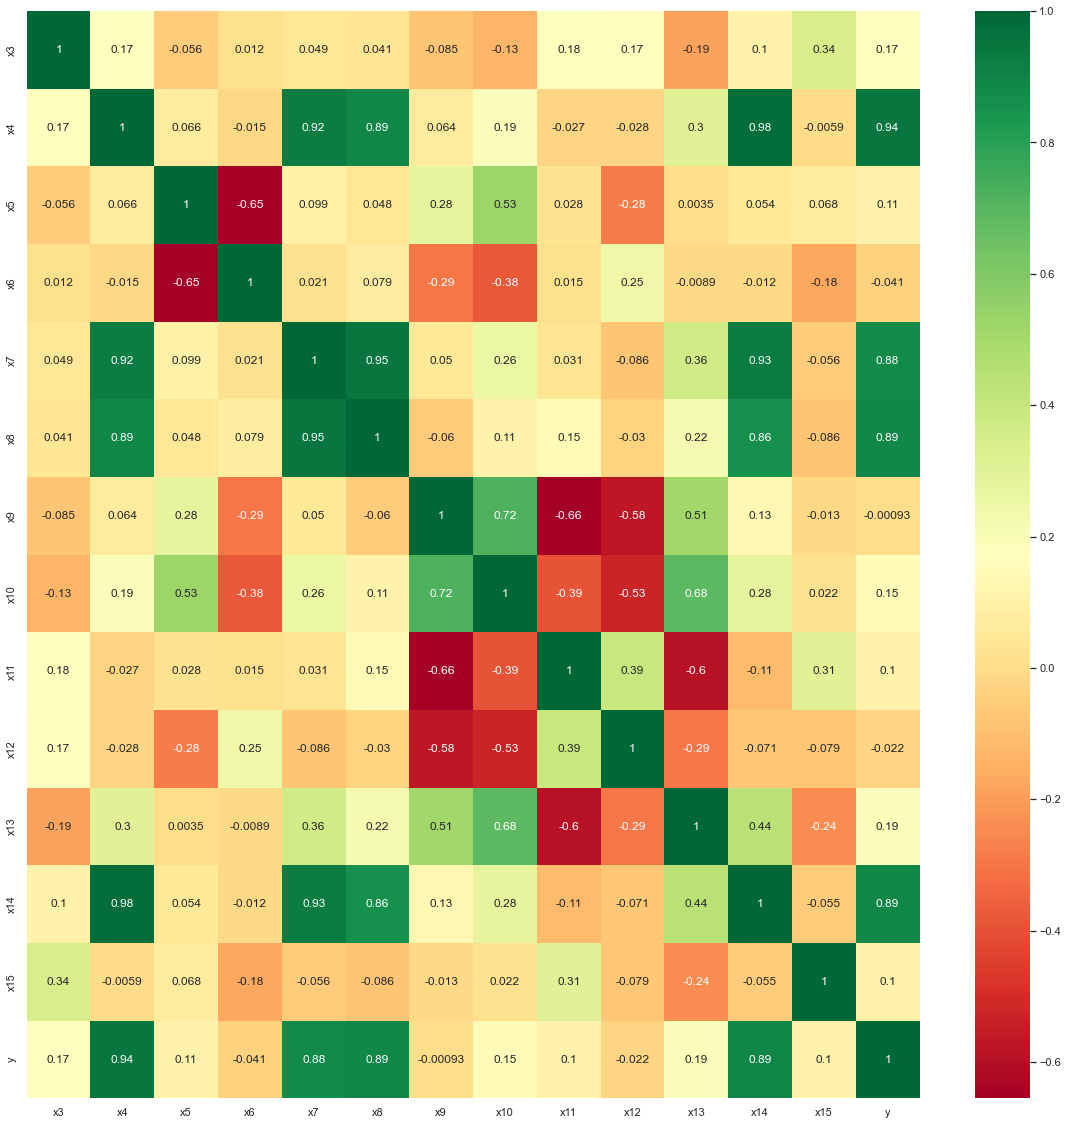

In [32]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(df_train.corr(), cmap="RdYlGn", annot=True)
plt.show()

Let's see scatterplot for few correlated variables  vs y.

In [33]:
col = ['x4', 'x8', 'x13', 'x14']

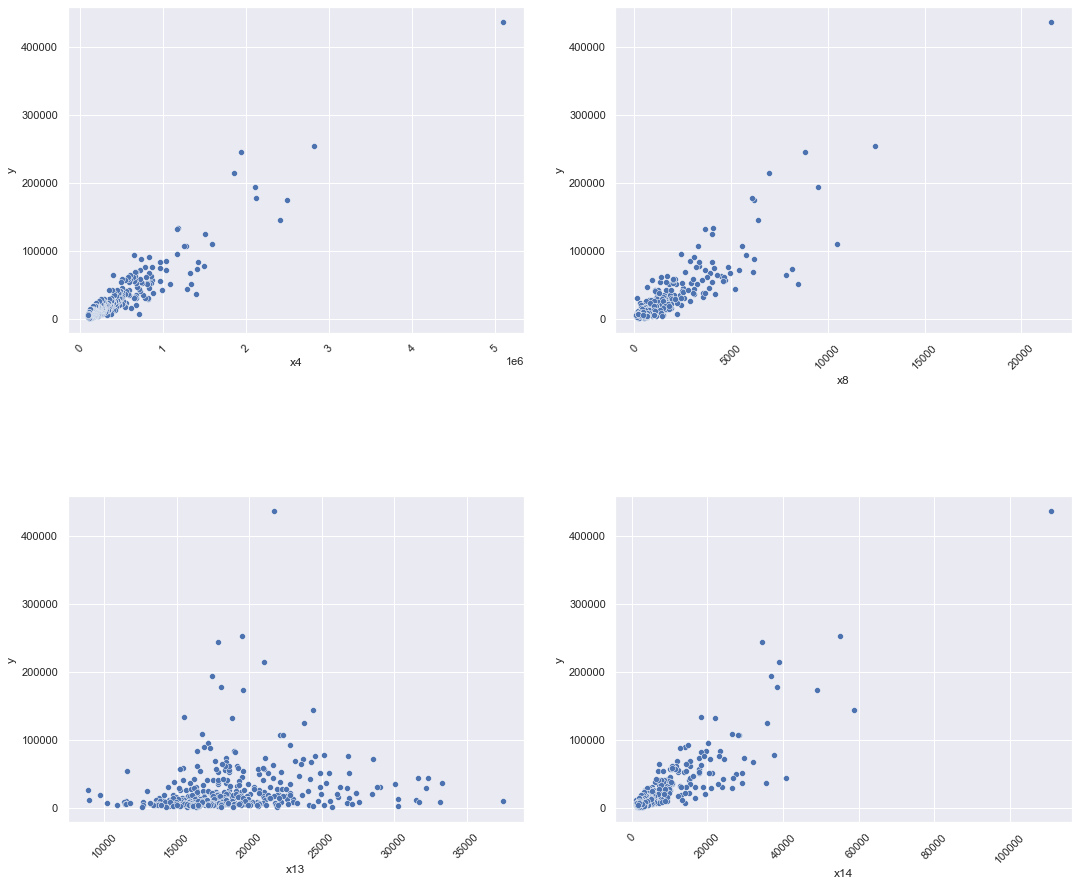

In [34]:
# Scatter Plot of independent variables vs dependent variables

fig,axes = plt.subplots(2,2,figsize=(18,15))
for seg,col in enumerate(col):
    x,y = seg//2,seg%2
    an=sns.scatterplot(x=col, y='y' ,data=df3, ax=axes[x,y])
    plt.setp(an.get_xticklabels(), rotation=45)
   
plt.subplots_adjust(hspace=0.5)

- We can see there is a line we can fit in above plots

### Dividing into X and Y sets for the model building

In [35]:
y_train = df_train.pop('y')
X_train = df_train

<a id="6"></a> <br>
## Step 6: Building a Linear Model

### Forward model selection

## Univariate Regreession

In [36]:
X_train_1 = X_train['x3']

In [37]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [38]:
# Check parameters created

lr_1.params

const   0.0000
x3      0.1664
dtype: float64

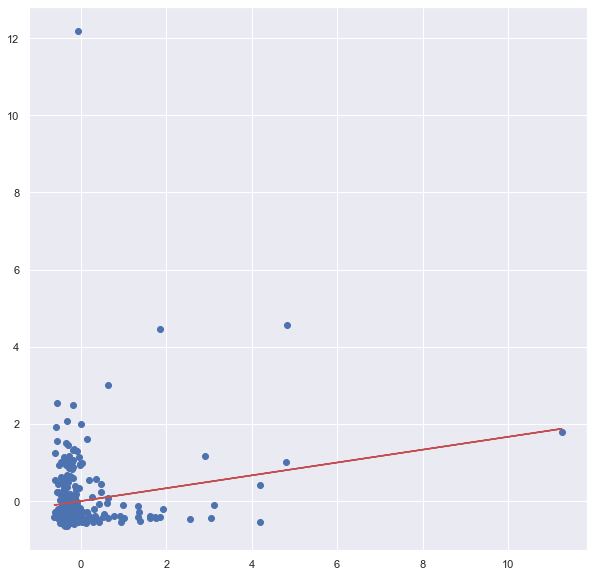

In [39]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize = (10, 10))
plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.1664*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [40]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     8.656
Date:                Wed, 26 Apr 2023   Prob (F-statistic):            0.00351
Time:                        04:17:11   Log-Likelihood:                -429.90
No. Observations:                 306   AIC:                             863.8
Df Residuals:                     304   BIC:                             871.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.057   4.91e-16      1.0

eval_env: 1


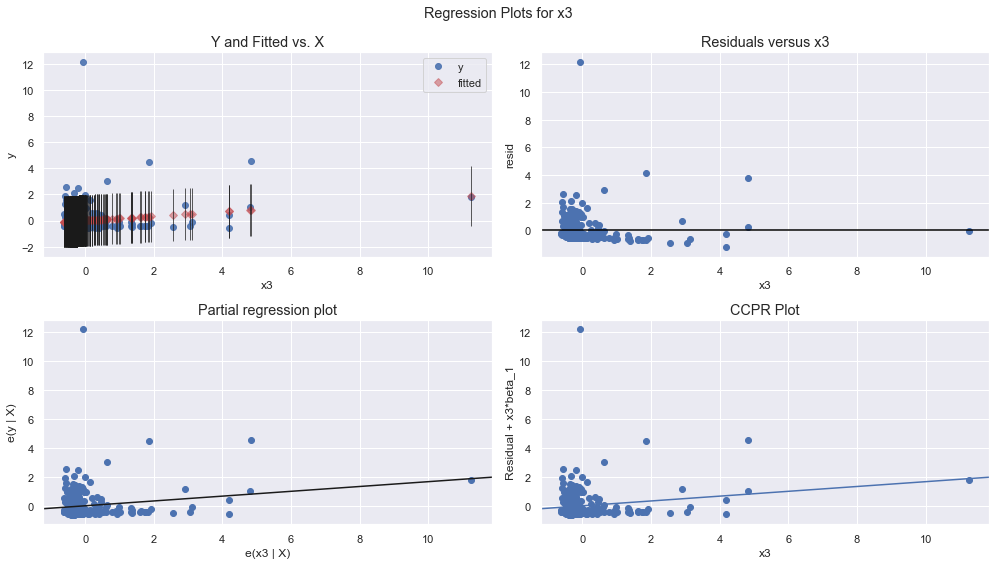

In [41]:
from statsmodels.formula.api import ols

# modify figure size
fig = plt.figure(figsize=(14, 8))

# creating regression plots
fig = sm.graphics.plot_regress_exog(lr_1,
                                    'x3',
                                    fig=fig)

The R-squared value obtained is `0.028`. Since Since we have so many variables, we will not add `x3` in our model.

In [42]:
X_train_2 = X_train['x4']

In [43]:
# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a first fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [44]:
# Check parameters created

lr_2.params

const   0.0000
x4      0.9434
dtype: float64

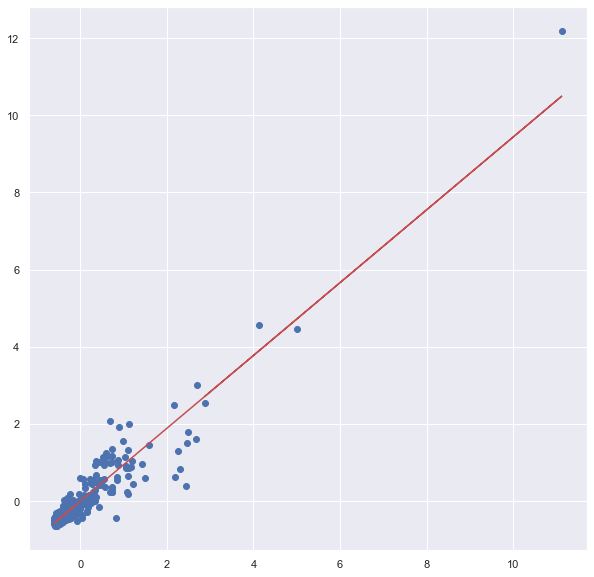

In [45]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize = (10, 10))
plt.scatter(X_train_2c.iloc[:, 1], y_train)
plt.plot(X_train_2c.iloc[:, 1], 0.9434*X_train_2c.iloc[:, 1], 'r')
plt.show()

In [46]:
# Print a summary of the linear regression model obtained
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     2460.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          9.41e-148
Time:                        04:17:13   Log-Likelihood:                -96.474
No. Observations:                 306   AIC:                             196.9
Df Residuals:                     304   BIC:                             204.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.019   1.46e-15      1.0

eval_env: 1


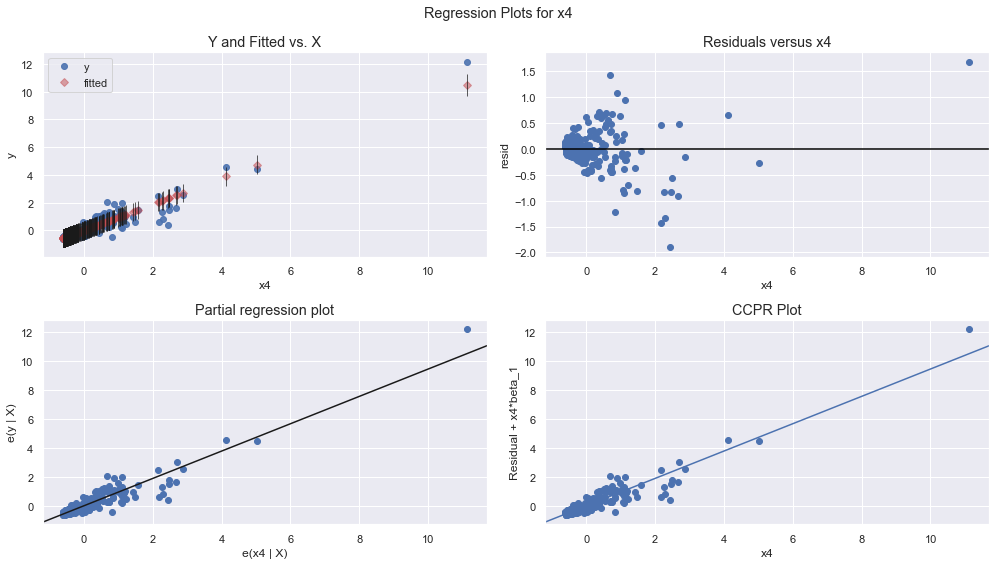

In [47]:
from statsmodels.formula.api import ols

# modify figure size
fig = plt.figure(figsize=(14, 8))

# creating regression plots
fig = sm.graphics.plot_regress_exog(lr_2,
                                    'x4',
                                    fig=fig)

The R-squared value obtained is `0.890`. We will add `x4` in our model. 

In [48]:
X_train_3 = X_train['x5']

In [49]:
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a first fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [50]:
# Check parameters created

lr_3.params

const   0.0000
x5      0.1106
dtype: float64

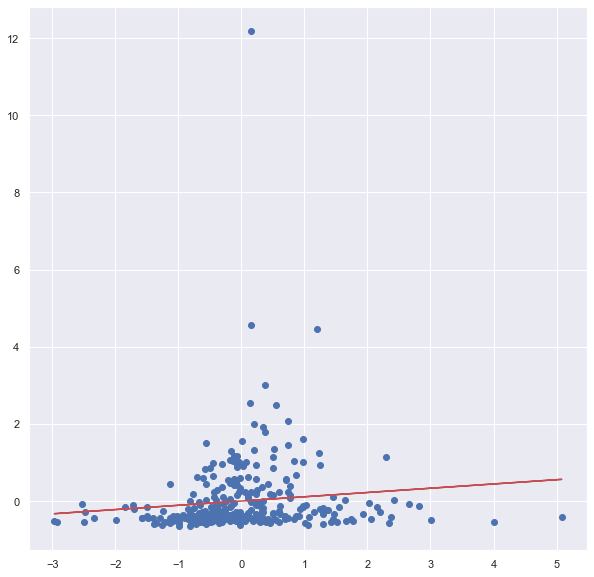

In [51]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize = (10, 10))
plt.scatter(X_train_3c.iloc[:, 1], y_train)
plt.plot(X_train_3c.iloc[:, 1], 0.1106*X_train_3c.iloc[:, 1], 'r')
plt.show()

In [52]:
# Print a summary of the linear regression model obtained
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.764
Date:                Wed, 26 Apr 2023   Prob (F-statistic):             0.0533
Time:                        04:17:14   Log-Likelihood:                -432.31
No. Observations:                 306   AIC:                             868.6
Df Residuals:                     304   BIC:                             876.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.057   4.87e-16      1.0

eval_env: 1


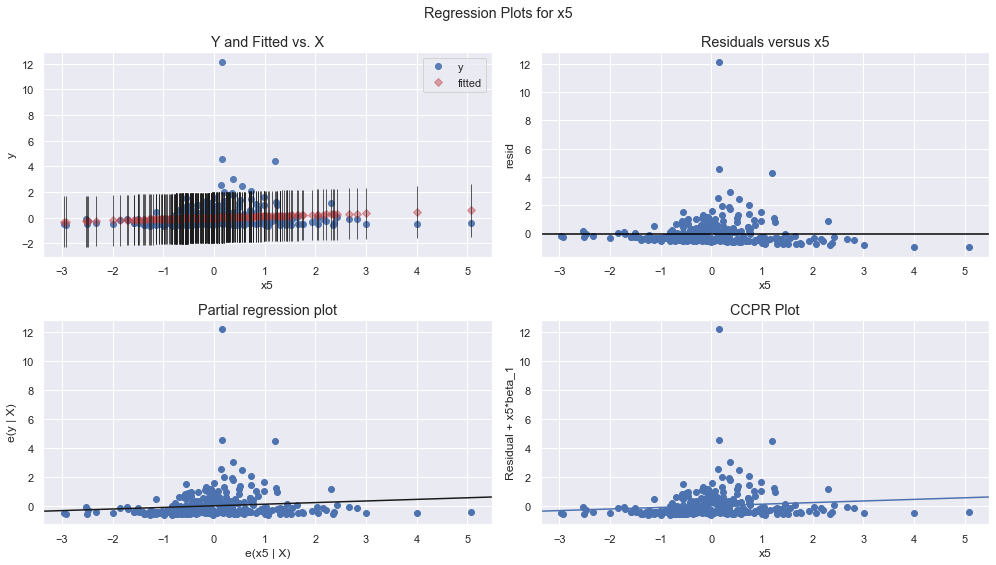

In [53]:
from statsmodels.formula.api import ols

# modify figure size
fig = plt.figure(figsize=(14, 8))

# creating regression plots
fig = sm.graphics.plot_regress_exog(lr_3,
                                    'x5',
                                    fig=fig)

The R-squared value obtained is `0.012`. Since we have so many variables, we will not add `x5` in our model.

In [54]:
X_train_4 = X_train['x6']

In [55]:
# Add a constant
X_train_4c = sm.add_constant(X_train_4)

# Create a first fitted model
lr_4 = sm.OLS(y_train, X_train_4c).fit()

In [56]:
# Check parameters created

lr_4.params

const   0.0000 
x6      -0.0406
dtype: float64

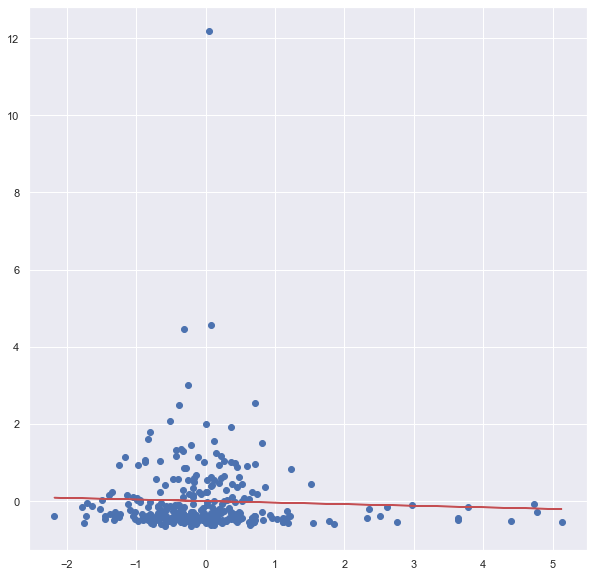

In [57]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize = (10, 10))
plt.scatter(X_train_4c.iloc[:, 1], y_train)
plt.plot(X_train_4c.iloc[:, 1], -0.0406*X_train_4c.iloc[:, 1], 'r')
plt.show()

In [58]:
# Print a summary of the linear regression model obtained
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5008
Date:                Wed, 26 Apr 2023   Prob (F-statistic):              0.480
Time:                        04:17:16   Log-Likelihood:                -433.94
No. Observations:                 306   AIC:                             871.9
Df Residuals:                     304   BIC:                             879.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.057   4.84e-16      1.0

eval_env: 1


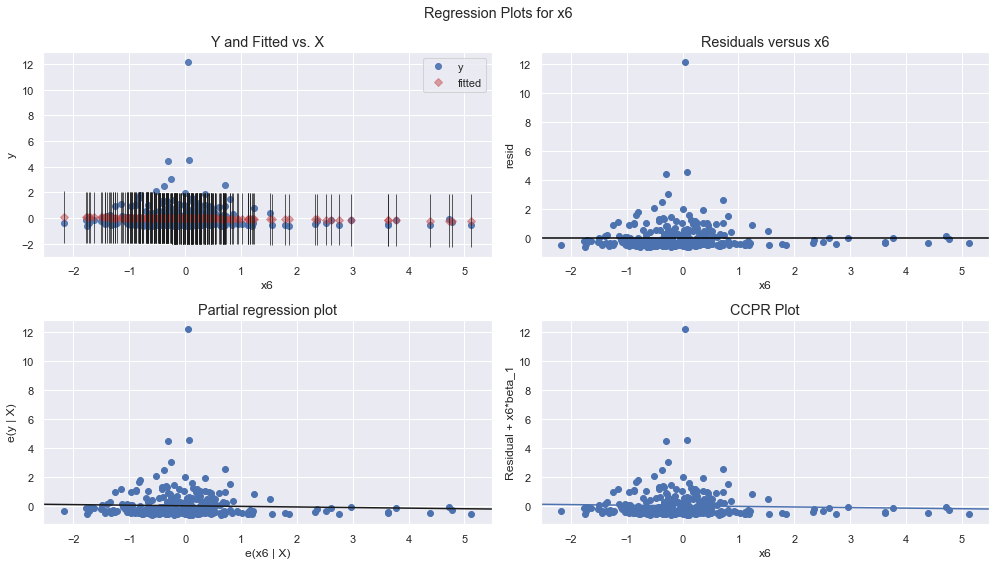

In [59]:
from statsmodels.formula.api import ols

# modify figure size
fig = plt.figure(figsize=(14, 8))

# creating regression plots
fig = sm.graphics.plot_regress_exog(lr_4,
                                    'x6',
                                    fig=fig)

The R-squared value obtained is `0.002`. Since we have so many variables, we will not add `x6` in our model.

In [60]:
X_train_5 = X_train['x7']

In [61]:
# Add a constant
X_train_5c = sm.add_constant(X_train_5)

# Create a first fitted model
lr_5 = sm.OLS(y_train, X_train_5c).fit()

In [62]:
# Check parameters created

lr_5.params

const   0.0000
x7      0.8794
dtype: float64

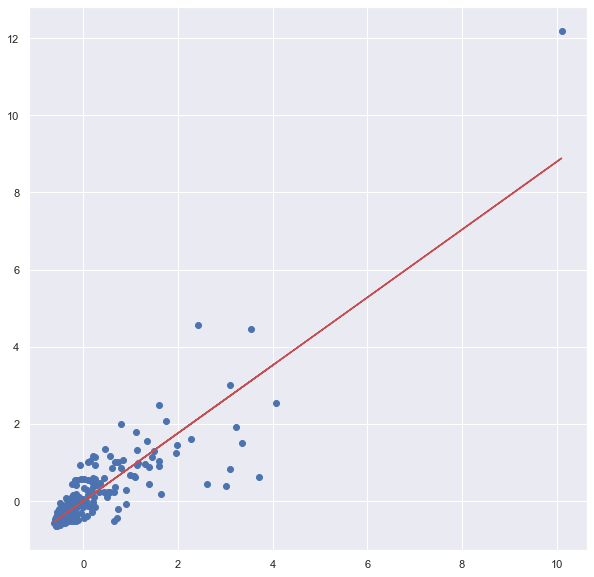

In [63]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize = (10, 10))
plt.scatter(X_train_5c.iloc[:, 1], y_train)
plt.plot(X_train_5c.iloc[:, 1], 0.8794*X_train_5c.iloc[:, 1], 'r')
plt.show()

In [64]:
# Print a summary of the linear regression model obtained
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     1037.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          5.43e-100
Time:                        04:17:17   Log-Likelihood:                -207.10
No. Observations:                 306   AIC:                             418.2
Df Residuals:                     304   BIC:                             425.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.027   1.02e-15      1.0

eval_env: 1


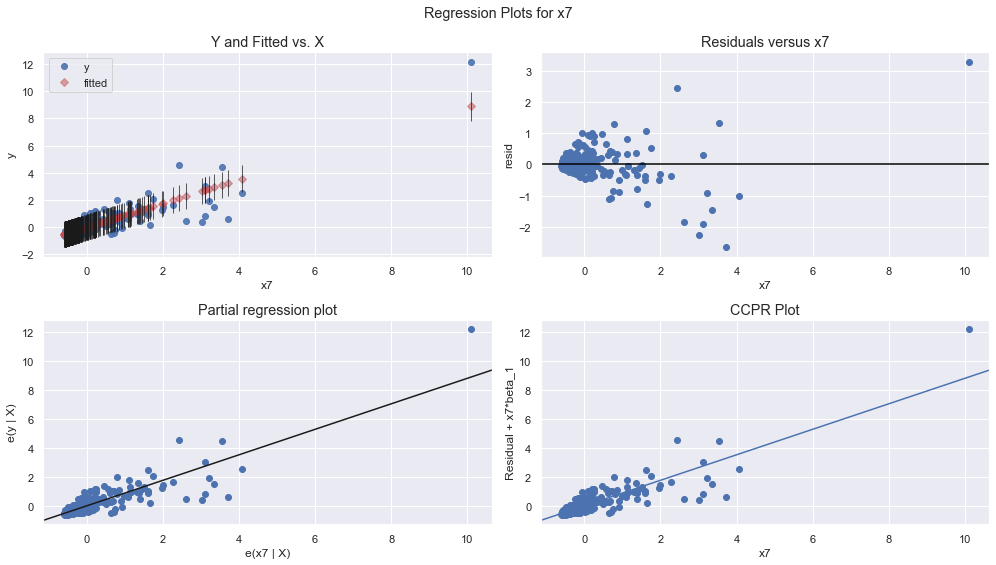

In [65]:
from statsmodels.formula.api import ols

# modify figure size
fig = plt.figure(figsize=(14, 8))

# creating regression plots
fig = sm.graphics.plot_regress_exog(lr_5,
                                    'x7',
                                    fig=fig)

The R-squared value obtained is `0.773`. We will add `x7` in our model. 

In [66]:
X_train_6 = X_train['x8']

In [67]:
# Add a constant
X_train_6c = sm.add_constant(X_train_6)

# Create a first fitted model
lr_6 = sm.OLS(y_train, X_train_6c).fit()

In [68]:
# Check parameters created

lr_6.params

const   0.0000
x8      0.8886
dtype: float64

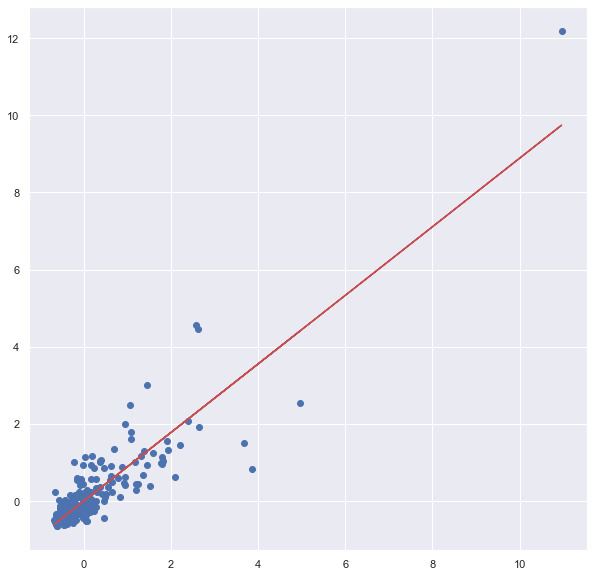

In [69]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize = (10, 10))
plt.scatter(X_train_6c.iloc[:, 1], y_train)
plt.plot(X_train_6c.iloc[:, 1], 0.8886*X_train_6c.iloc[:, 1], 'r')
plt.show()

In [70]:
# Print a summary of the linear regression model obtained
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     1141.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          6.70e-105
Time:                        04:17:18   Log-Likelihood:                -195.73
No. Observations:                 306   AIC:                             395.5
Df Residuals:                     304   BIC:                             402.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.026   1.05e-15      1.0

eval_env: 1


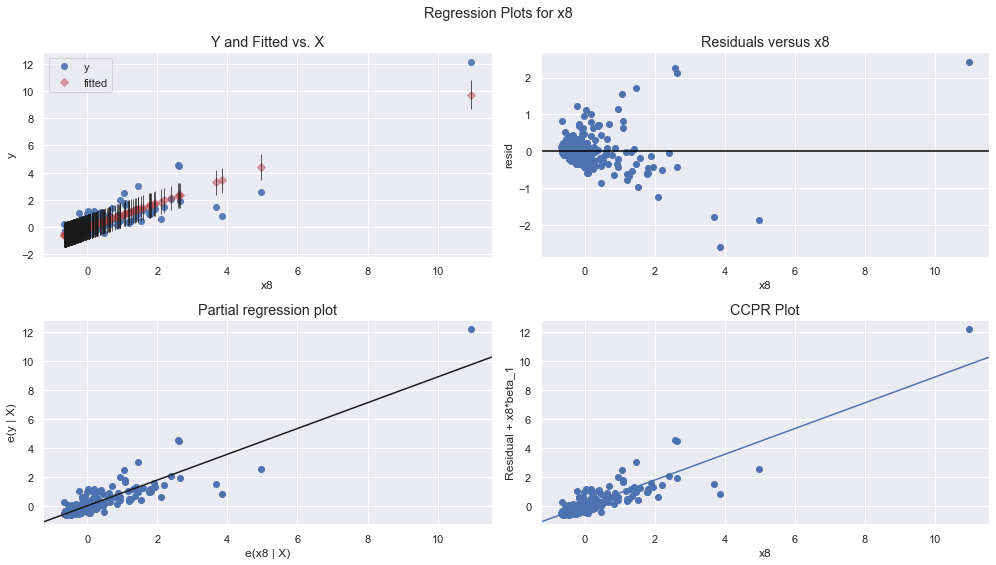

In [71]:
from statsmodels.formula.api import ols

# modify figure size
fig = plt.figure(figsize=(14, 8))

# creating regression plots
fig = sm.graphics.plot_regress_exog(lr_6,
                                    'x8',
                                    fig=fig)

The R-squared value obtained is `0.790`. We will add `x8` in our model. 

In [72]:
X_train_7 = X_train['x9']

In [73]:
# Add a constant
X_train_7c = sm.add_constant(X_train_7)

# Create a first fitted model
lr_7 = sm.OLS(y_train, X_train_7c).fit()

In [74]:
# Check parameters created

lr_7.params

const   0.0000 
x9      -0.0009
dtype: float64

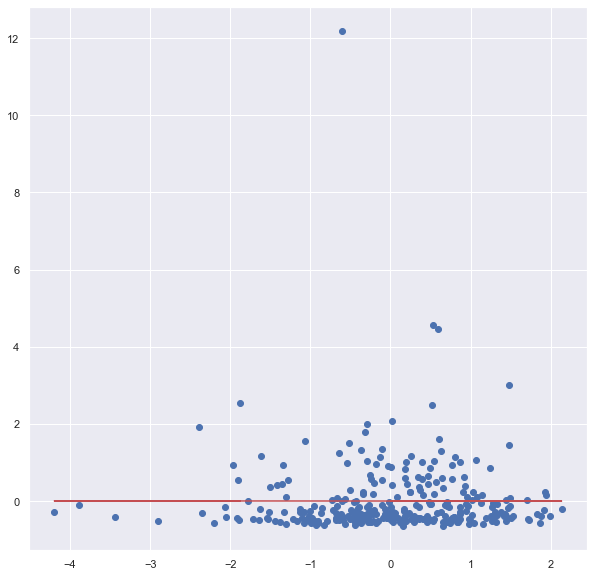

In [75]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize = (10, 10))
plt.scatter(X_train_7c.iloc[:, 1], y_train)
plt.plot(X_train_7c.iloc[:, 1], -0.0009*X_train_7c.iloc[:, 1], 'r')
plt.show()

In [76]:
# Print a summary of the linear regression model obtained
print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                 0.0002657
Date:                Wed, 26 Apr 2023   Prob (F-statistic):              0.987
Time:                        04:17:19   Log-Likelihood:                -434.20
No. Observations:                 306   AIC:                             872.4
Df Residuals:                     304   BIC:                             879.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.057   4.84e-16      1.0

eval_env: 1


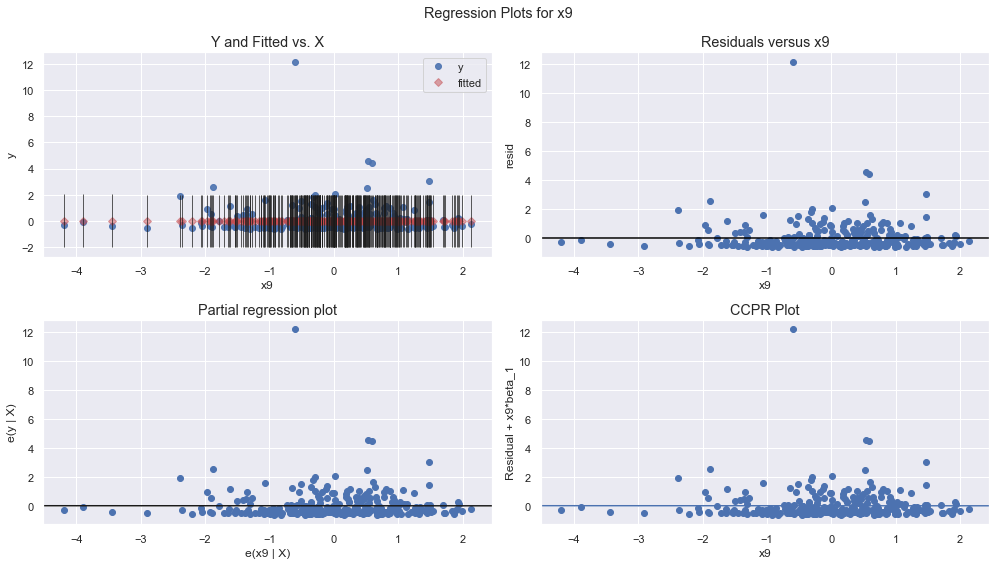

In [77]:
from statsmodels.formula.api import ols

# modify figure size
fig = plt.figure(figsize=(14, 8))

# creating regression plots
fig = sm.graphics.plot_regress_exog(lr_7,
                                    'x9',
                                    fig=fig)

The R-squared value obtained is `0.000`. Since we have so many variables, we will not add `x9` in our model.

In [78]:
X_train_8 = X_train['x10']

In [79]:
# Add a constant
X_train_8c = sm.add_constant(X_train_8)

# Create a first fitted model
lr_8 = sm.OLS(y_train, X_train_8c).fit()

In [80]:
# Check parameters created

lr_8.params

const   0.0000
x10     0.1503
dtype: float64

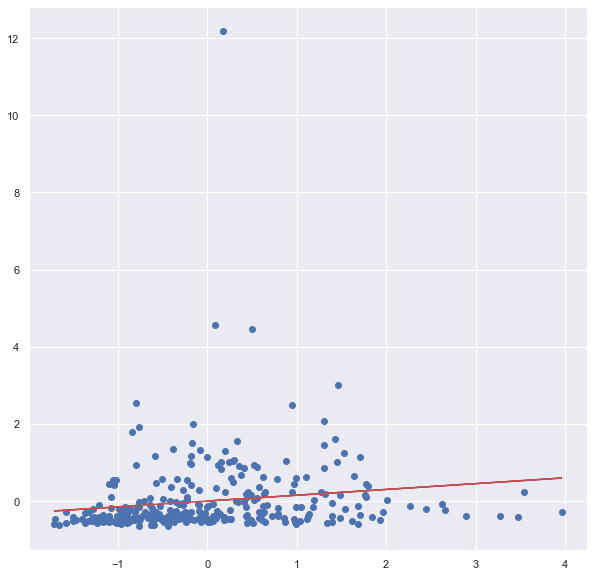

In [81]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize = (10, 10))
plt.scatter(X_train_8c.iloc[:, 1], y_train)
plt.plot(X_train_8c.iloc[:, 1], 0.1503*X_train_8c.iloc[:, 1], 'r')
plt.show()

In [82]:
# Print a summary of the linear regression model obtained
print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     7.028
Date:                Wed, 26 Apr 2023   Prob (F-statistic):            0.00845
Time:                        04:17:20   Log-Likelihood:                -430.70
No. Observations:                 306   AIC:                             865.4
Df Residuals:                     304   BIC:                             872.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.057   4.89e-16      1.0

eval_env: 1


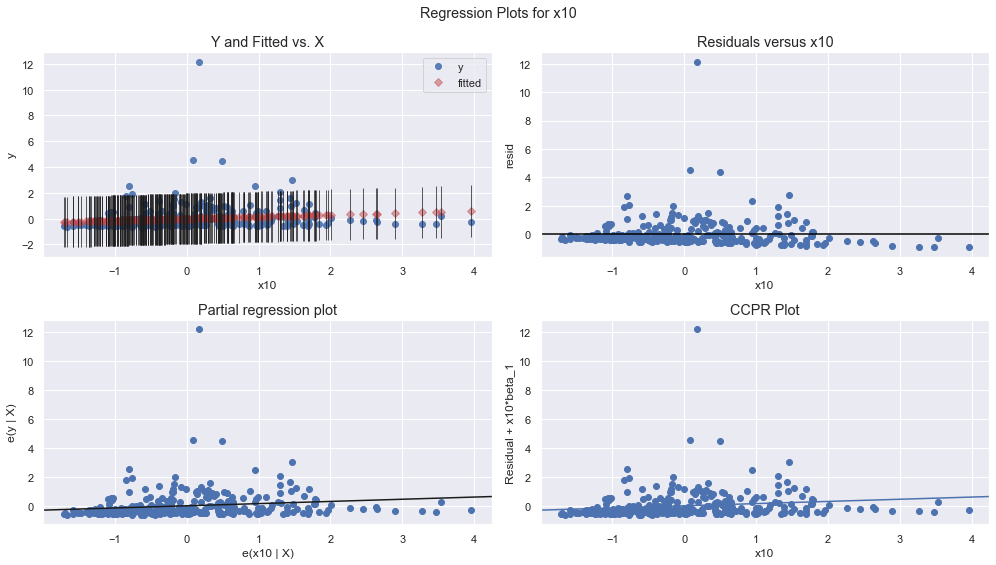

In [83]:
from statsmodels.formula.api import ols

# modify figure size
fig = plt.figure(figsize=(14, 8))

# creating regression plots
fig = sm.graphics.plot_regress_exog(lr_8,
                                    'x10',
                                    fig=fig)

The R-squared value obtained is `0.023`. Since we have so many variables, we will not add `x10` in our model.

In [84]:
X_train_9 = X_train['x11']

In [85]:
# Add a constant
X_train_9c = sm.add_constant(X_train_9)

# Create a first fitted model
lr_9 = sm.OLS(y_train, X_train_9c).fit()

In [86]:
# Check parameters created

lr_9.params

const   0.0000
x11     0.1043
dtype: float64

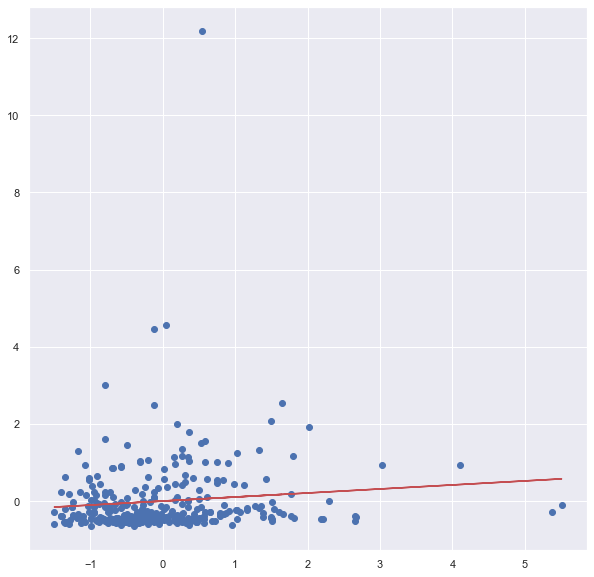

In [87]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize = (10, 10))
plt.scatter(X_train_9c.iloc[:, 1], y_train)
plt.plot(X_train_9c.iloc[:, 1], 0.1043*X_train_9c.iloc[:, 1], 'r')
plt.show()

In [88]:
# Print a summary of the linear regression model obtained
print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.343
Date:                Wed, 26 Apr 2023   Prob (F-statistic):             0.0685
Time:                        04:17:22   Log-Likelihood:                -432.52
No. Observations:                 306   AIC:                             869.0
Df Residuals:                     304   BIC:                             876.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.057   4.87e-16      1.0

eval_env: 1


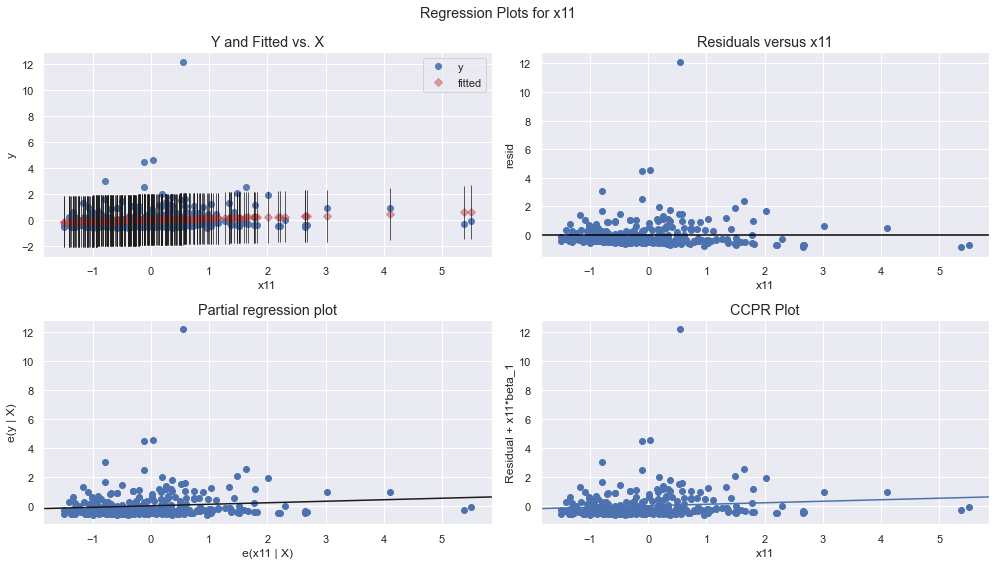

In [89]:
from statsmodels.formula.api import ols

# modify figure size
fig = plt.figure(figsize=(14, 8))

# creating regression plots
fig = sm.graphics.plot_regress_exog(lr_9,
                                    'x11',
                                    fig=fig)

The R-squared value obtained is `0.011`. Since we have so many variables, we will not add `x11` in our model.

In [90]:
X_train_10 = X_train['x12']

In [91]:
# Add a constant
X_train_10c = sm.add_constant(X_train_10)

# Create a first fitted model
lr_10 = sm.OLS(y_train, X_train_10c).fit()

In [92]:
# Check parameters created

lr_10.params

const   0.0000 
x12     -0.0219
dtype: float64

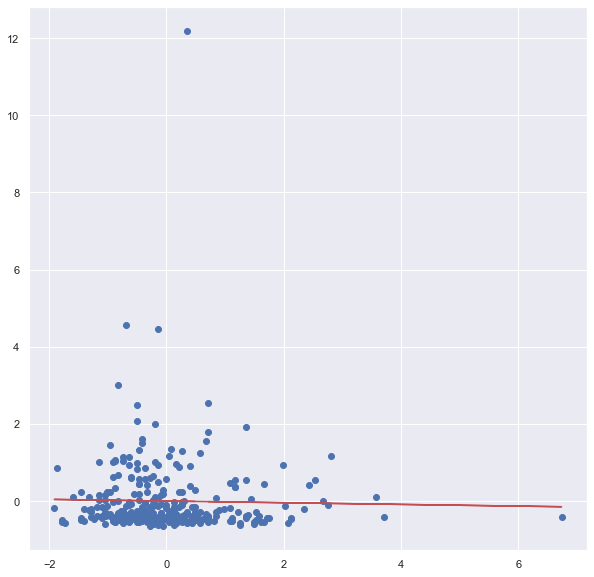

In [93]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize = (10, 10))
plt.scatter(X_train_10c.iloc[:, 1], y_train)
plt.plot(X_train_10c.iloc[:, 1], -0.0219*X_train_10c.iloc[:, 1], 'r')
plt.show()

In [94]:
# Print a summary of the linear regression model obtained
print(lr_10.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1453
Date:                Wed, 26 Apr 2023   Prob (F-statistic):              0.703
Time:                        04:17:23   Log-Likelihood:                -434.12
No. Observations:                 306   AIC:                             872.2
Df Residuals:                     304   BIC:                             879.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.057   4.84e-16      1.0

eval_env: 1


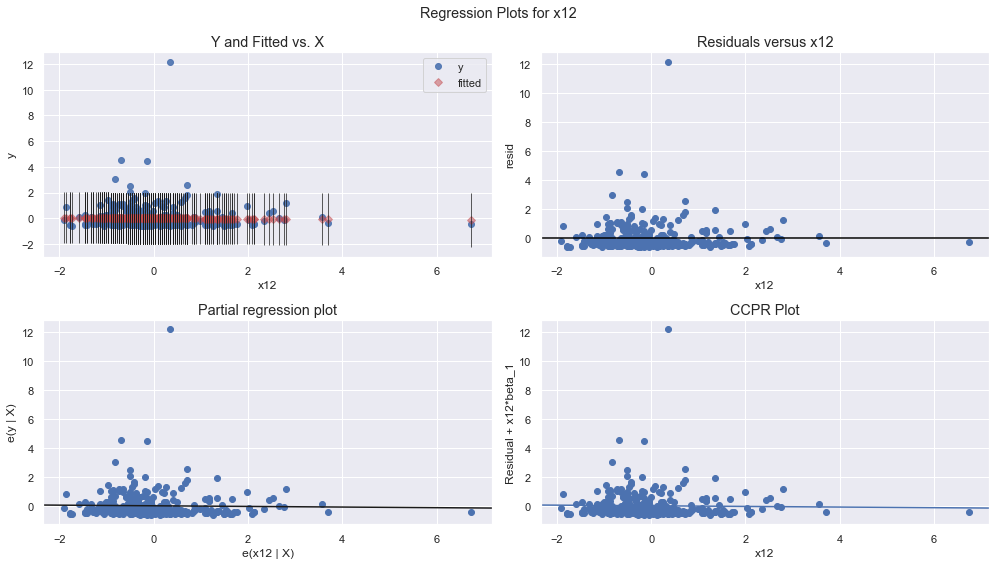

In [95]:
from statsmodels.formula.api import ols

# modify figure size
fig = plt.figure(figsize=(14, 8))

# creating regression plots
fig = sm.graphics.plot_regress_exog(lr_10,
                                    'x12',
                                    fig=fig)

The R-squared value obtained is `0.000`. Since we have so many variables, we will not add `x12` in our model.

In [96]:
X_train_11 = X_train['x13']

In [97]:
# Add a constant
X_train_11c = sm.add_constant(X_train_11)

# Create a first fitted model
lr_11 = sm.OLS(y_train, X_train_11c).fit()

In [98]:
# Check parameters created

lr_11.params

const   0.0000
x13     0.1885
dtype: float64

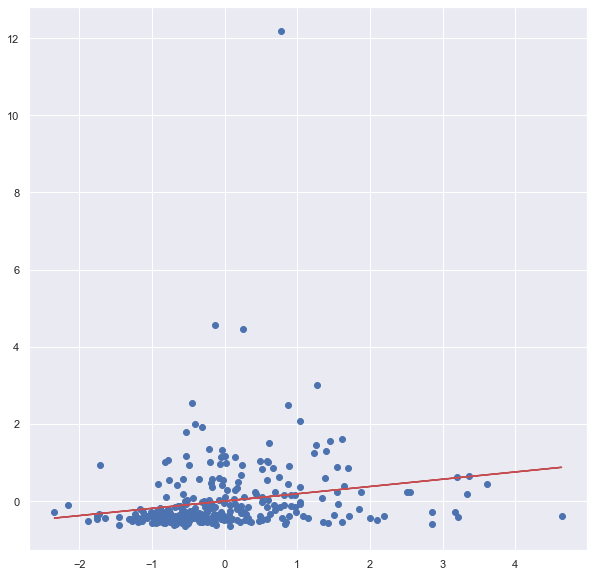

In [99]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize = (10, 10))
plt.scatter(X_train_11c.iloc[:, 1], y_train)
plt.plot(X_train_11c.iloc[:, 1], 0.1885*X_train_11c.iloc[:, 1], 'r')
plt.show()

In [100]:
# Print a summary of the linear regression model obtained
print(lr_11.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     11.20
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           0.000922
Time:                        04:17:24   Log-Likelihood:                -428.66
No. Observations:                 306   AIC:                             861.3
Df Residuals:                     304   BIC:                             868.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.056   4.93e-16      1.0

eval_env: 1


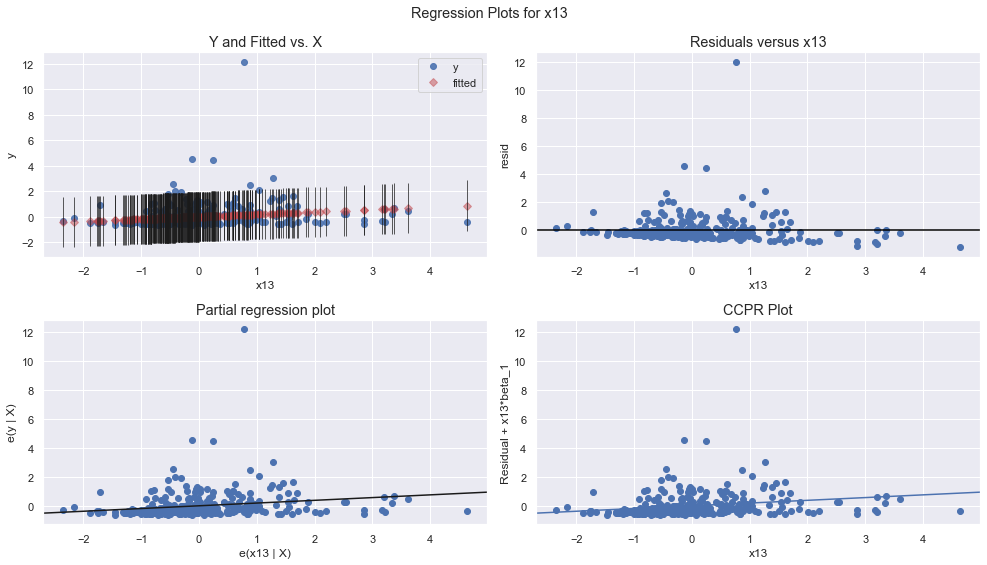

In [101]:
from statsmodels.formula.api import ols

# modify figure size
fig = plt.figure(figsize=(14, 8))

# creating regression plots
fig = sm.graphics.plot_regress_exog(lr_11,
                                    'x13',
                                    fig=fig)

The R-squared value obtained is `0.036`. Since we have so many variables, we will not add `x13` in our model.

In [102]:
X_train_12 = X_train['x14']

In [103]:
# Add a constant
X_train_12c = sm.add_constant(X_train_12)

# Create a first fitted model
lr_12 = sm.OLS(y_train, X_train_12c).fit()

In [104]:
# Check parameters created

lr_12.params

const   0.0000
x14     0.8948
dtype: float64

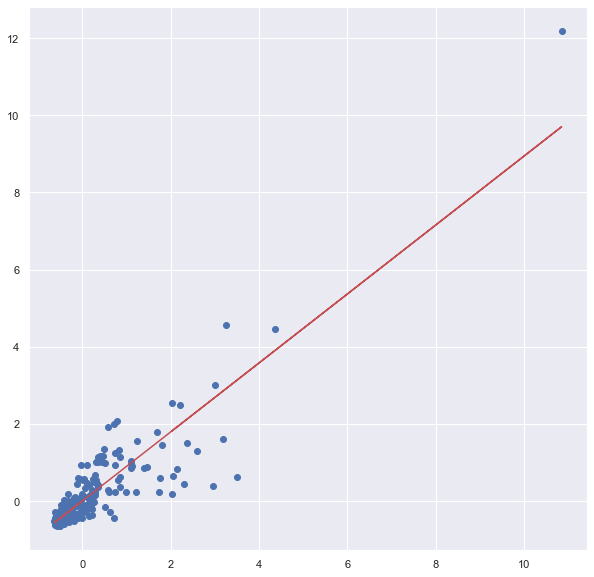

In [105]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize = (10, 10))
plt.scatter(X_train_12c.iloc[:, 1], y_train)
plt.plot(X_train_12c.iloc[:, 1], 0.8948*X_train_12c.iloc[:, 1], 'r')
plt.show()

In [106]:
# Print a summary of the linear regression model obtained
print(lr_12.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     1221.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          1.74e-108
Time:                        04:17:25   Log-Likelihood:                -187.43
No. Observations:                 306   AIC:                             378.9
Df Residuals:                     304   BIC:                             386.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.026   1.08e-15      1.0

eval_env: 1


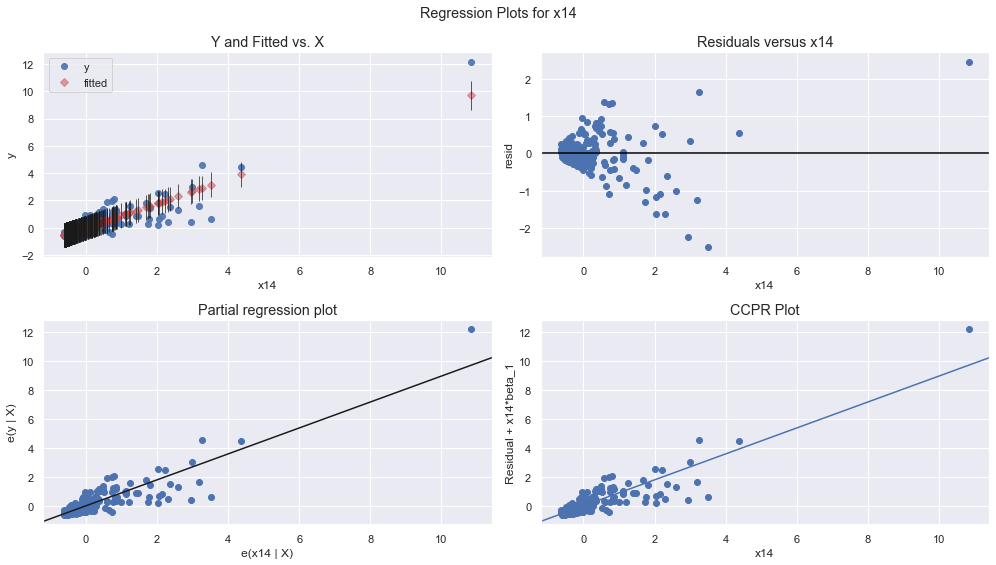

In [107]:
from statsmodels.formula.api import ols

# modify figure size
fig = plt.figure(figsize=(14, 8))

# creating regression plots
fig = sm.graphics.plot_regress_exog(lr_12,
                                    'x14',
                                    fig=fig)

The R-squared value obtained is `0.801`. We will add `x14` in our model.

In [108]:
X_train_13 = X_train['x15']

In [109]:
# Add a constant
X_train_13c = sm.add_constant(X_train_13)

# Create a first fitted model
lr_13 = sm.OLS(y_train, X_train_13c).fit()

In [110]:
# Check parameters created

lr_13.params

const   0.0000
x15     0.1045
dtype: float64

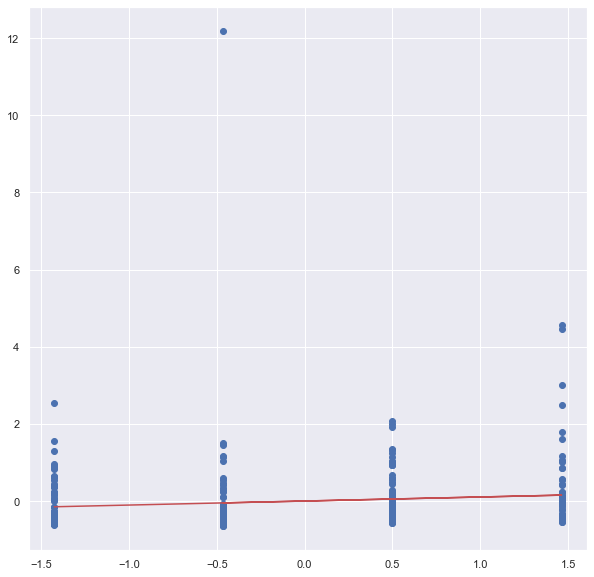

In [111]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize = (10, 10))
plt.scatter(X_train_13c.iloc[:, 1], y_train)
plt.plot(X_train_13c.iloc[:, 1], 0.1045*X_train_13c.iloc[:, 1], 'r')
plt.show()

In [112]:
# Print a summary of the linear regression model obtained
print(lr_13.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     3.357
Date:                Wed, 26 Apr 2023   Prob (F-statistic):             0.0679
Time:                        04:17:27   Log-Likelihood:                -432.51
No. Observations:                 306   AIC:                             869.0
Df Residuals:                     304   BIC:                             876.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.057   4.87e-16      1.0

eval_env: 1


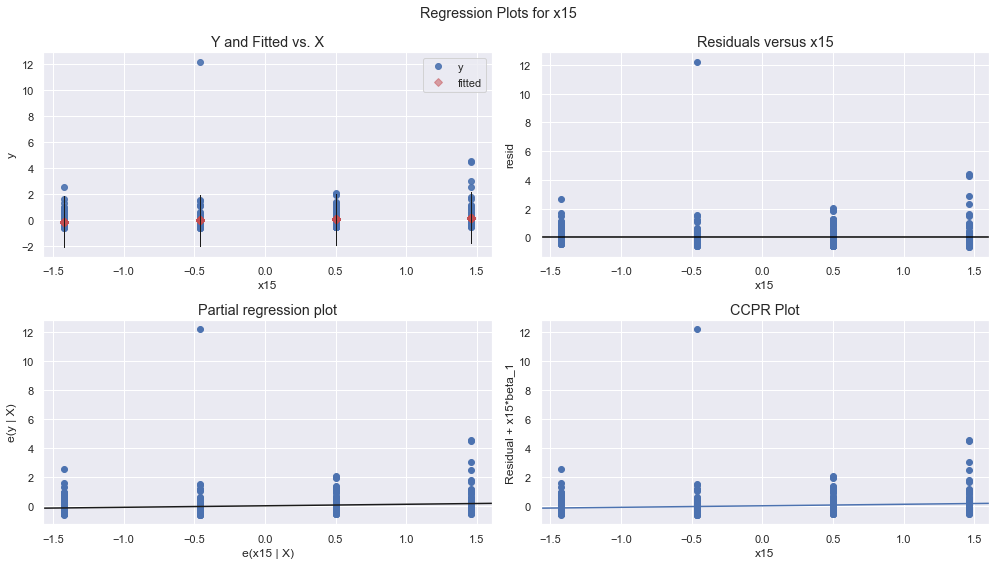

In [113]:
from statsmodels.formula.api import ols

# modify figure size
fig = plt.figure(figsize=(14, 8))

# creating regression plots
fig = sm.graphics.plot_regress_exog(lr_13,
                                    'x15',
                                    fig=fig)

The R-squared value obtained is `0.011`. Since we have so many variables, we will not add `x15` in our model.

#### Conclusion:
* The R-squared value of `x4`, `x7`, `x8`, and `x14` obtained are `0.890`, `0.773`, `0.790` and `0.801` respectively.
* The Variables `x7` and `x8` are highly correlated So, we will add `x7` from our model. 
* The model will contain the variables `x4`, `x8` and `x14`.

In [114]:
X_train_1 = X_train['x4']

In [115]:
# Add a constant
X_train_1c = sm.add_constant(X_train_1)

# Create a first fitted model
lr_1 = sm.OLS(y_train, X_train_1c).fit()

In [116]:
# Check parameters created

lr_1.params

const   0.0000
x4      0.9434
dtype: float64

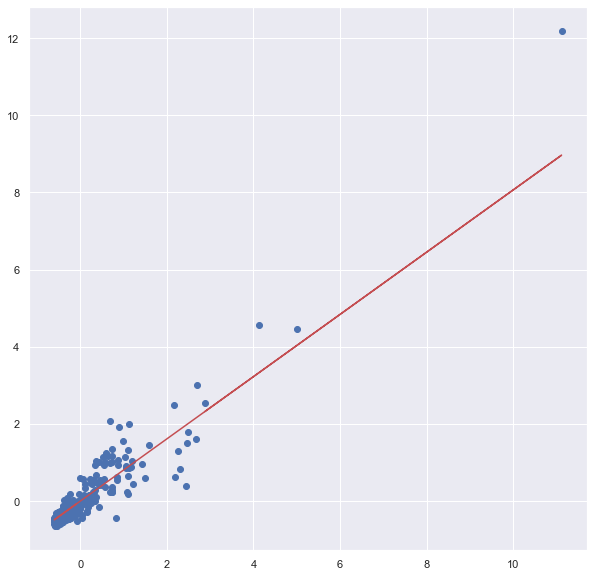

In [117]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.figure(figsize = (10, 10))
plt.scatter(X_train_1c.iloc[:, 1], y_train)
plt.plot(X_train_1c.iloc[:, 1], 0.8062*X_train_1c.iloc[:, 1], 'r')
plt.show()

In [118]:
# Print a summary of the linear regression model obtained
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     2460.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          9.41e-148
Time:                        04:17:28   Log-Likelihood:                -96.474
No. Observations:                 306   AIC:                             196.9
Df Residuals:                     304   BIC:                             204.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.019   1.46e-15      1.0

### Adding another variable

The R-squared value obtained is `0.890`. Since we have so many variables, we can clearly do better than this. So let's go ahead and add the other highly correlated variable, i.e. `x14`. 

In [119]:
X_train_2 = X_train[['x4', 'x14']]

In [120]:
# Add a constant
X_train_2c = sm.add_constant(X_train_2)

# Create a second fitted model
lr_2 = sm.OLS(y_train, X_train_2c).fit()

In [121]:
lr_2.params

const   0.0000 
x4      1.6029 
x14     -0.6739
dtype: float64

In [122]:
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     1517.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          1.45e-158
Time:                        04:17:28   Log-Likelihood:                -67.159
No. Observations:                 306   AIC:                             140.3
Df Residuals:                     303   BIC:                             151.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.017    1.6e-15      1.0

 - The R-squared incresed from 0.930 to 0.947

### Adding another variable

The R-squared value obtained is `0.909`. Since we have so many variables, we can clearly do better than this. So lets add another correlated variable, i.e. `x8`.

In [123]:
X_train_3 = X_train[['x4', 'x8', 'x14']]

In [124]:
# Add a constant
X_train_3c = sm.add_constant(X_train_3)

# Create a third fitted model
lr_3 = sm.OLS(y_train, X_train_3c).fit()

In [125]:
lr_3.params

const   0.0000 
x4      1.3679 
x8      0.1922 
x14     -0.6087
dtype: float64

In [126]:
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1107.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          1.50e-162
Time:                        04:17:28   Log-Likelihood:                -54.022
No. Observations:                 306   AIC:                             116.0
Df Residuals:                     302   BIC:                             130.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.017   1.67e-15      1.0

We have achieved a R-squared of `0.917` by manually picking the highly correlated variables.
Now lets use RFE to select the independent variables which accurately predicts the dependent variable `y`.

In [127]:
# Predicting value y of training set.

y_train_value1 = lr_3.predict(X_train_3c)

#### Applying the scaling on the test sets

In [128]:
import warnings
warnings.filterwarnings("ignore")

df_test[sig_col] = scaler.fit_transform(df_test[sig_col])
df_test.shape

(132, 14)

#### Dividing test set into X_test and y_test

In [129]:
y_test = df_test.pop('y')
X_test = df_test

In [130]:
# Adding constant
X_test = sm.add_constant(X_test)

X_test_new = X_test[X_train_3c.columns]

In [131]:
# Making predictions using the final model
y_pred = lr_3.predict(X_test_new)

## RMSE Score

In [132]:
r2_score(y_test, y_pred)

0.9452464261993888

**The R2 score of Training set is 0.917 and Test set is 0.945 which is quite close.
Hence, We can say that our model is good enough to predict the Car prices using below predictor variables**
- x4
- x8
- x14

#### Equation of Line to predict for `y` value
$ y = 1.3679*x4 + 0.1922*x8 - 0.6087*x14$

#### Model I Conclusions:
- R-sqaured and Adjusted R-squared - 0.917 and 0.916 - 91% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 1107.0 and 1.50e-162(approx. 0.0) - Model fit is significant and explained 91%<br> variance is just not by chance.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the <br>predictors are statistically significant.

#### Other ways to find model

## Implementing Best subset selection (using itertools.combinations)

In [133]:
import itertools
import time
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline
plt.style.use('ggplot')

In [134]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [135]:
#Importing tqdm for the progress bar
from tqdm import tnrange, tqdm_notebook
import itertools

#Initialization variables
Y = df3.y
X = df3.drop(columns = 'y', axis = 1)
k = 10
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 10 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 10 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'R_squared':R_squared_list,'features':feature_list})

Loop...:   0%|          | 0/13 [00:00<?, ?it/s]

## Finding the best subsets for each number of features

Using the smallest RSS Value, or the largest R_squared value 

In [136]:
df_min = df[df.groupby('numb_features')['RSS'].transform(min) == df['RSS']]
df_max = df[df.groupby('numb_features')['R_squared'].transform(max) == df['R_squared']]
display(df_min.head(3))
display(df_max.head(3))


,numb_features,RSS,R_squared,features
1,1,72391134361.1159,0.8831,"(x4,)"
34,2,54525980580.6152,0.9120,"(x4, x14)"
189,3,48743839976.8954,0.9213,"(x4, x8, x14)"


,numb_features,RSS,R_squared,features
1,1,72391134361.1159,0.8831,"(x4,)"
34,2,54525980580.6152,0.9120,"(x4, x14)"
189,3,48743839976.8954,0.9213,"(x4, x8, x14)"


In [137]:
df_min

,numb_features,RSS,R_squared,features
1,1,72391134361.1159,0.8831,"(x4,)"
34,2,54525980580.6152,0.9120,"(x4, x14)"
189,3,48743839976.8954,0.9213,"(x4, x8, x14)"
726,4,44189372377.3233,0.9287,"(x4, x8, x14, x15)"
1221,5,42621121063.2930,0.9312,"(x3, x4, x8, x14, x15)"
2463,6,42218715797.0634,0.9318,"(x3, x4, x5, x8, x14, x15)"
4534,7,41671117884.2695,0.9327,"(x3, x4, x8, x11, x13, x14, x15)"
6026,8,41188039110.5191,0.9335,"(x3, x4, x5, x8, x9, x13, x14, x15)"
7243,9,41021944716.4308,0.9338,"(x3, x4, x5, x7, x8, x9, x13, x14, x15)"
7910,10,40841275622.9899,0.9341,"(x3, x4, x5, x7, x8, x9, x11, x13, x14, x15)"


In [138]:
df_max

,numb_features,RSS,R_squared,features
1,1,72391134361.1159,0.8831,"(x4,)"
34,2,54525980580.6152,0.9120,"(x4, x14)"
189,3,48743839976.8954,0.9213,"(x4, x8, x14)"
726,4,44189372377.3233,0.9287,"(x4, x8, x14, x15)"
1221,5,42621121063.2930,0.9312,"(x3, x4, x8, x14, x15)"
2463,6,42218715797.0634,0.9318,"(x3, x4, x5, x8, x14, x15)"
4534,7,41671117884.2695,0.9327,"(x3, x4, x8, x11, x13, x14, x15)"
6026,8,41188039110.5191,0.9335,"(x3, x4, x5, x8, x9, x13, x14, x15)"
7243,9,41021944716.4308,0.9338,"(x3, x4, x5, x7, x8, x9, x13, x14, x15)"
7910,10,40841275622.9899,0.9341,"(x3, x4, x5, x7, x8, x9, x11, x13, x14, x15)"


## Plotting the minimum RSS and Maximum R_square Vs Number of features

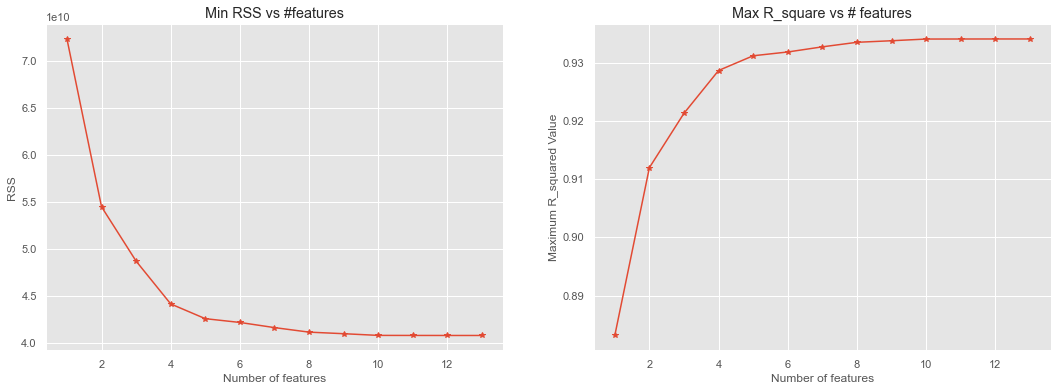

In [139]:
  
# initialize x and y coordinates
fig = plt.figure(figsize = (18,6))
features = df_max['numb_features']
Min_RSS = df_max['RSS']
Max_R_squared = df_max['R_squared']

plt.subplot(1,2,1)
plt.plot(features, Min_RSS, marker="*")
plt.title("Min RSS vs #features")
plt.ylabel("RSS")
plt.xlabel("Number of features")
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(features, Max_R_squared, marker="*")
plt.title("Max R_square vs # features")
plt.ylabel("Maximum R_squared Value")
plt.xlabel("Number of features")
plt.grid(True)

plt.show()

## Adding columns to the dataframe with RSS and R squared values of the best subset

In [140]:
df['min_RSS'] = df.groupby('numb_features')['RSS'].transform(min)
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)
df.head()


,numb_features,RSS,R_squared,features,min_RSS,max_R_squared
0,1,605883313008.9521,0.0219,"(x3,)",72391134361.1159,0.8831
1,1,72391134361.1159,0.8831,"(x4,)",72391134361.1159,0.8831
2,1,612186740572.6947,0.0117,"(x5,)",72391134361.1159,0.8831
3,1,618788694701.0162,0.0010,"(x6,)",72391134361.1159,0.8831
4,1,166121821657.6101,0.7318,"(x7,)",72391134361.1159,0.8831


## Plotting the best subset selection process

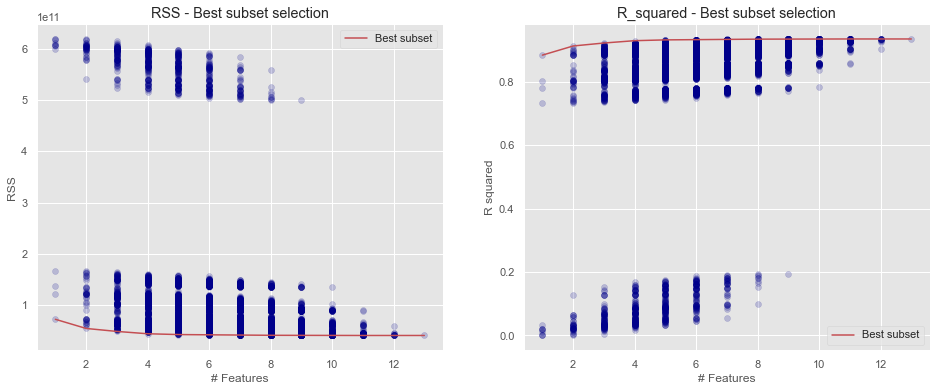

In [141]:
fig = plt.figure(figsize = (16,6))
ax = fig.add_subplot(1, 2, 1)

ax.scatter(df.numb_features,df.RSS, alpha = .2, color = 'darkblue' )
ax.set_xlabel('# Features')
ax.set_ylabel('RSS')
ax.set_title('RSS - Best subset selection')
ax.plot(df.numb_features,df.min_RSS,color = 'r', label = 'Best subset')
ax.legend()

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

## Forward stepwise selection

For computational reasons, the best subset cannot be applied for any large n
due to the $2^n$ complexity. Forward Stepwise begins with a model containing no predictors, and then adds predictors to the model, one at the time. At each step, the variable that gives the greatest additional improvement to the fit is added to the model.

### Algorithm

Let $M_0$ denote the null model which contains no predictors

 - For $k=1,2,...,n−1$

   - Consider all $n−k$ models that augment the predictors in $M_k$ with one 
     additional predictor
   - Choose the \textit{best} among these $n−k$ models, and call it $M_k+1$
   - Select the single best model among $M_0,M_1,...,M_n$ using cross validated 
     predicton error, $C_p, BIC, adjusted R^2$ or any other method.

In [142]:
#Initialization variables
#Y = df2.Y
##X = df2.drop(columns = 'Balance', axis = 1)
k = 10

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],Y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

In [143]:
print('Forward stepwise subset selection')
print('Number of features |', 'Features |', 'RSS')
display([(i,features_list[i], round(RSS_list[i])) for i in range(1,11)])

Forward stepwise subset selection
Number of features | Features | RSS


[(1, ['x4'], 72391134361),
 (2, ['x4', 'x14'], 54525980581),
 (3, ['x4', 'x14', 'x8'], 48743839977),
 (4, ['x4', 'x14', 'x8', 'x15'], 44189372377),
 (5, ['x4', 'x14', 'x8', 'x15', 'x3'], 42621121063),
 (6, ['x4', 'x14', 'x8', 'x15', 'x3', 'x5'], 42218715797),
 (7, ['x4', 'x14', 'x8', 'x15', 'x3', 'x5', 'x13'], 41863611005),
 (8, ['x4', 'x14', 'x8', 'x15', 'x3', 'x5', 'x13', 'x9'], 41188039111),
 (9, ['x4', 'x14', 'x8', 'x15', 'x3', 'x5', 'x13', 'x9', 'x7'], 41021944716),
 (10,
  ['x4', 'x14', 'x8', 'x15', 'x3', 'x5', 'x13', 'x9', 'x7', 'x11'],
  40841275623)]

## Comparing models: AIC, BIC, Mallows'CP

The training set Mean Squared Error (MSE) is generally an underestimate of the test MSE. This is because when we fit a model to the training data using least squares, we specifically estimate the regression coefficients such that the training RSS is minimized. In particular, the training RSS decreases as we add more features to the model, but the test error may not. Therefore the training RSS and $R^2$ may not be used for selecting the best model unless we adjust for this underestimation.

## Mallow's $Cp$

Mallow's $C_p$ is named after Colin Lingwood Mallows and is defined as:

$C_p=(1/m)*(RSS+2dσ'^2)$

where $σ'^2$ is an estimate of the variance of the error ϵ associated with each response measurement. Typically $σ'^2$ is estimated using the full model containing all predictors.

### Akaike's Information Criteria (AIC)
The AIC criterion is defiend for a large class of models fit by maximum likelihood. In the case of a linear model with Gaussian errors, MLE and least squares are the same thing and the AIC is given by

$AIC=(1/(mσ'^2))*(RSS+2dσ'^2)$

## Bayesian Information Criteria (BIC)
BIC is derived from a Bayesian point of view, and looks similar to the $C_p$
and AIC- it is defined (up to irrelevant constants) as:

$BIC=(1/mσ'^2)(RSS+log(m)dσ'^2)$

Like $C_p$ and AIC, the BIC will tend to take small values for a model with low test error.

## Adjusted R2
Since the $R^2$ always increases as more variables are added, the adjusted $R_2$ accounts for that fact and introduces a penalty. The intuition is that once all the correct variables have been included in the model,additional noise variables will lead to a very small decrase in RSS, but an increase in $k$
 and hence will decrease the adjusted $R_2$. In effect, we pay a price for the inclusion of unnecessary variables in the model.

$R_a^2=1−(RSS/(m−k−1))/(TSS/(m−1))=1−((1−R2)(m−1)/(m−k−1))$

## Theoretical justification
$C_p, AIC, BIC$ all have rigorous theoretical justification that rely on asymptotic arguments, i.e. when the sample size m grows very large, whereas the adjusted $R^2$, although quite intuitive, is not as well motivated in statistical theory.


## Combining forward stepwise results into a new DataFrame

In [144]:
df1 = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df1['numb_features'] = df1.index

## Computing the C_p, AIC, BIC and R-square adjusted

In [145]:
#Initializing useful variables
m = len(Y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df1['RSS'])

#Computing
df1['C_p'] = (1/m) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['AIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] + 2 * df1['numb_features'] * hat_sigma_squared )
df1['BIC'] = (1/(m*hat_sigma_squared)) * (df1['RSS'] +  np.log(m) * df1['numb_features'] * hat_sigma_squared )
df1['R_squared_adj'] = 1 - ( (1 - df1['R_squared'])*(m-1)/(m-df1['numb_features'] -1))
df1

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[x4],72391134361.1159,0.8831,1,165714332.0529,1.7285,1.7378,0.8829
2,"[x4, x14]",54525980580.6152,0.9120,2,125364079.3075,1.3076,1.3263,0.9116
3,"[x4, x14, x8]",48743839976.8954,0.9213,3,112600614.6370,1.1745,1.2025,0.9208
4,"[x4, x14, x8, x15]",44189372377.3234,0.9287,4,102640056.3687,1.0706,1.1079,0.9280
5,"[x4, x14, x8, x15, x3]",42621121063.2930,0.9312,5,99497343.5012,1.0378,1.0844,0.9304
6,"[x4, x14, x8, x15, x3, x5]",42218715797.0634,0.9318,6,99016379.6012,1.0328,1.0887,0.9309
7,"[x4, x14, x8, x15, x3, x5, x13]",41863611004.6015,0.9324,7,98643407.6504,1.0289,1.0942,0.9313
8,"[x4, x14, x8, x15, x3, x5, x13, x9]",41188039110.5191,0.9335,8,97538775.6504,1.0174,1.0920,0.9323
9,"[x4, x14, x8, x15, x3, x5, x13, x9, x7]",41021944716.4308,0.9338,9,97597334.2895,1.0180,1.1019,0.9324
10,"[x4, x14, x8, x15, x3, x5, x13, x9, x7, x11]",40841275622.9899,0.9341,10,97622617.3594,1.0183,1.1115,0.9325


In [146]:
df1['R_squared_adj'].idxmax()
df1['R_squared_adj'].max()

0.9325218522688434

## Plotting the computed values as a function of number of features¶

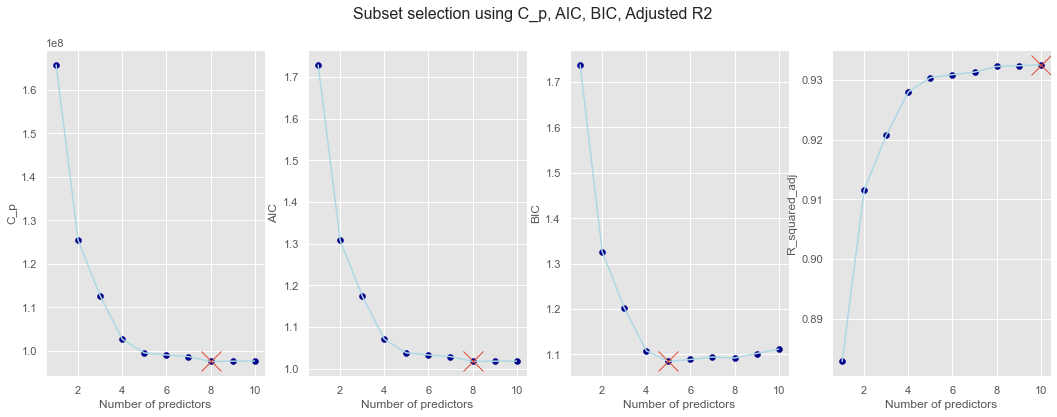

In [147]:
variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df1['numb_features'],df1[v], color = 'lightblue')
    ax.scatter(df1['numb_features'],df1[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df1[v].idxmax(),df1[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df1[v].idxmin(),df1[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()


### Backword model selection

### RFE
Let's use Recursive feature elimination since we have too many independent variables

In [148]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=10, step=1)             
rfe = rfe.fit(X_train, y_train)

In [149]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('x3', True, 1),
 ('x4', True, 1),
 ('x5', True, 1),
 ('x6', False, 4),
 ('x7', True, 1),
 ('x8', True, 1),
 ('x9', False, 2),
 ('x10', True, 1),
 ('x11', True, 1),
 ('x12', False, 3),
 ('x13', True, 1),
 ('x14', True, 1),
 ('x15', True, 1)]

In [150]:
# Selecting the variables which are in support

col_sup = X_train.columns[rfe.support_]
col_sup

Index(['x3', 'x4', 'x5', 'x7', 'x8', 'x10', 'x11', 'x13', 'x14', 'x15'], dtype='object')

In [151]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col_sup]

After passing the arbitary selected columns by RFE we will manually evaluate each models p-value and VIF value.
Unless we find the acceptable range for p-values and VIF we keep dropping the variables one at a time based on below criteria.
- High p-value High VIF : Drop the variable
- High p-value Low VIF or Low p-value High VIF : Drop the variable with high p-value first
- Low p-value Low VIF : accept the variable

In [152]:
# Adding a constant variable and Build a first fitted model
import statsmodels.api as sm  
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train,X_train_rfec).fit()

#Summary of linear model
print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     405.7
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          6.22e-166
Time:                        04:18:07   Log-Likelihood:                -22.406
No. Observations:                 306   AIC:                             66.81
Df Residuals:                     295   BIC:                             107.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.015   1.83e-15      1.0

- Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables)<br>
and we need to drop it

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [153]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,x14,74.3100
1,x4,72.4300
3,x7,23.5700
4,x8,18.5000
7,x13,5.6800
5,x10,4.4700
2,x5,2.2100
6,x11,2.2000
9,x15,1.4700
0,x3,1.4500


We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the variable and updating the model

*Dropping `x10` beacuse its `p-value` is `0.926` and we want p-value less than 0.05 and hence rebuilding the model*

In [154]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe1 = X_train_rfe.drop('x10', 1,)

# Adding a constant variable and Build a second fitted model

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

#Summary of linear model
print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     452.3
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          2.85e-167
Time:                        04:18:07   Log-Likelihood:                -22.410
No. Observations:                 306   AIC:                             64.82
Df Residuals:                     296   BIC:                             102.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.015   1.83e-15      1.0

In [155]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,x14,73.7900
1,x4,72.2900
3,x7,23.1900
4,x8,18.3300
6,x13,3.2500
5,x11,2.2000
0,x3,1.4500
8,x15,1.3500
2,x5,1.1000


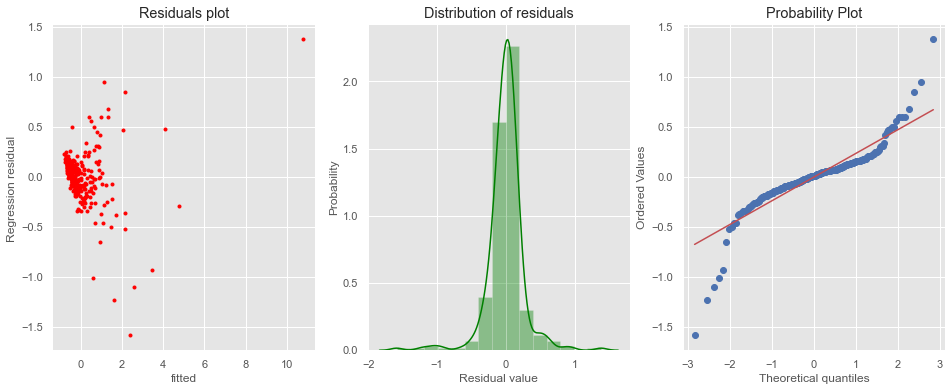

In [156]:
from scipy import stats
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))
ax1.plot(lm_rfe1.fittedvalues,lm_rfe1.resid, marker = '.', linestyle = 'none', c = 'red')
ax1.set_xlabel('fitted')
ax1.set_ylabel('Regression residual ')
ax1.set_title('Residuals plot')
#Figure 2: Plot of the distribution of the residuals
ax2 = sns.distplot(lm_rfe1.resid,ax = ax2, bins = 15, color = 'green')
ax2.set_ylabel('Probability')
ax2.set_xlabel('Residual value')
ax2.set_title('Distribution of residuals')

##
ax3 = stats.probplot(lm_rfe1.resid, dist = "norm", plot = plt)
plt.show()

*Dropping `x13` beacuse its `p-value` is `0.096` and we want p-value less than 0.05 and hence rebuilding the model*

In [157]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe2 = X_train_rfe1.drop('x13', 1,)

# Adding a constant variable and Build a third fitted model

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

#Summary of linear model
print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     505.4
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          4.91e-168
Time:                        04:18:07   Log-Likelihood:                -23.845
No. Observations:                 306   AIC:                             65.69
Df Residuals:                     297   BIC:                             99.20
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.015   1.83e-15      1.0

In [158]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,x14,50.7500
1,x4,49.3900
3,x7,23.1800
4,x8,18.0200
5,x11,1.5900
0,x3,1.4400
7,x15,1.3500
2,x5,1.0900


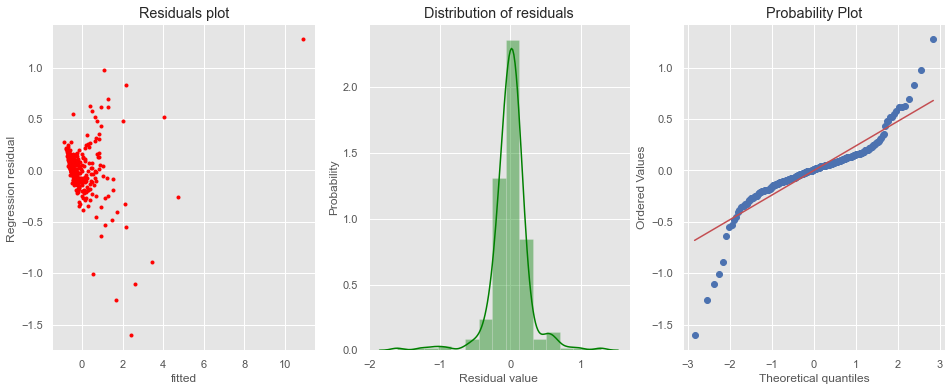

In [159]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))
ax1.plot(lm_rfe2.fittedvalues,lm_rfe2.resid, marker = '.', linestyle = 'none', c = 'red')
ax1.set_xlabel('fitted')
ax1.set_ylabel('Regression residual ')
ax1.set_title('Residuals plot')
#Figure 2: Plot of the distribution of the residuals
ax2 = sns.distplot(lm_rfe2.resid,ax = ax2, bins = 15, color = 'green')
ax2.set_ylabel('Probability')
ax2.set_xlabel('Residual value')
ax2.set_title('Distribution of residuals')

##
ax3 = stats.probplot(lm_rfe2.resid, dist = "norm", plot = plt)
plt.show()

*Dropping `x11` beacuse its `p-value` is `0.117` and we want p-value less than 0.05 and hence rebuilding the model*

In [160]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe3 = X_train_rfe2.drop('x11', 1,)

# Adding a constant variable and Build a fourth fitted model
X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

#Summary of linear model
print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     574.5
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          6.76e-169
Time:                        04:18:08   Log-Likelihood:                -25.114
No. Observations:                 306   AIC:                             66.23
Df Residuals:                     298   BIC:                             96.02
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.015   1.82e-15      1.0

In [161]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,x4,49.1800
5,x14,48.2700
3,x7,23.1800
4,x8,16.7100
0,x3,1.4200
6,x15,1.2300
2,x5,1.0900


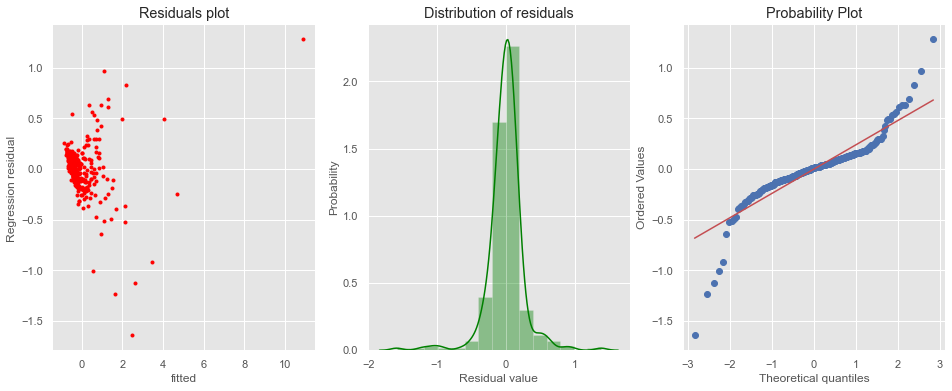

In [162]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))
ax1.plot(lm_rfe3.fittedvalues,lm_rfe3.resid, marker = '.', linestyle = 'none', c = 'red')
ax1.set_xlabel('fitted')
ax1.set_ylabel('Regression residual ')
ax1.set_title('Residuals plot')
#Figure 2: Plot of the distribution of the residuals
ax2 = sns.distplot(lm_rfe1.resid,ax = ax2, bins = 15, color = 'green')
ax2.set_ylabel('Probability')
ax2.set_xlabel('Residual value')
ax2.set_title('Distribution of residuals')

##
ax3 = stats.probplot(lm_rfe3.resid, dist = "norm", plot = plt)
plt.show()

*Dropping `x4` beacuse its `VIF` is `49.1800` and we want VIF less than 5 and hence rebuilding the model*

In [163]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe4 = X_train_rfe3.drop('x4', 1,)

# Adding a constant variable and Build a fifth fitted model
X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

#Summary of linear model
print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     457.1
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          2.27e-147
Time:                        04:18:09   Log-Likelihood:                -79.280
No. Observations:                 306   AIC:                             172.6
Df Residuals:                     299   BIC:                             198.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.018   1.53e-15      1.0

In [164]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,x7,19.6000
3,x8,10.1500
4,x14,7.6500
0,x3,1.1800
5,x15,1.1700
1,x5,1.0600


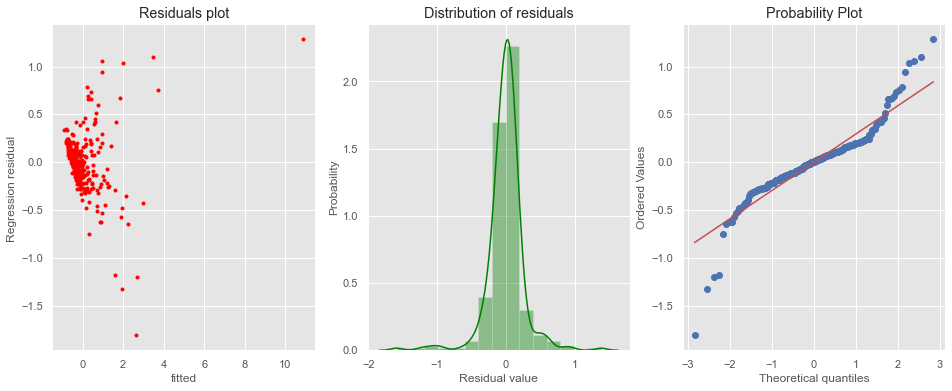

In [165]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))
ax1.plot(lm_rfe4.fittedvalues,lm_rfe4.resid, marker = '.', linestyle = 'none', c = 'red')
ax1.set_xlabel('fitted')
ax1.set_ylabel('Regression residual ')
ax1.set_title('Residuals plot')
#Figure 2: Plot of the distribution of the residuals
ax2 = sns.distplot(lm_rfe1.resid,ax = ax2, bins = 15, color = 'green')
ax2.set_ylabel('Probability')
ax2.set_xlabel('Residual value')
ax2.set_title('Distribution of residuals')

##
ax3 = stats.probplot(lm_rfe4.resid, dist = "norm", plot = plt)
plt.show()

*Dropping `x3` beacuse its `p-value` is `0.060` and we want p-value less than 0.05 and hence rebuilding the model*

In [166]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe5 = X_train_rfe4.drop('x3', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe5c = sm.add_constant(X_train_rfe5)
lm_rfe5 = sm.OLS(y_train, X_train_rfe5c).fit()

#Summary of linear model
print(lm_rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     543.2
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          5.41e-148
Time:                        04:18:09   Log-Likelihood:                -81.089
No. Observations:                 306   AIC:                             174.2
Df Residuals:                     300   BIC:                             196.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.018   1.52e-15      1.0

In [167]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,x7,19.4200
2,x8,10.1300
3,x14,7.4600
0,x5,1.0500
4,x15,1.0200


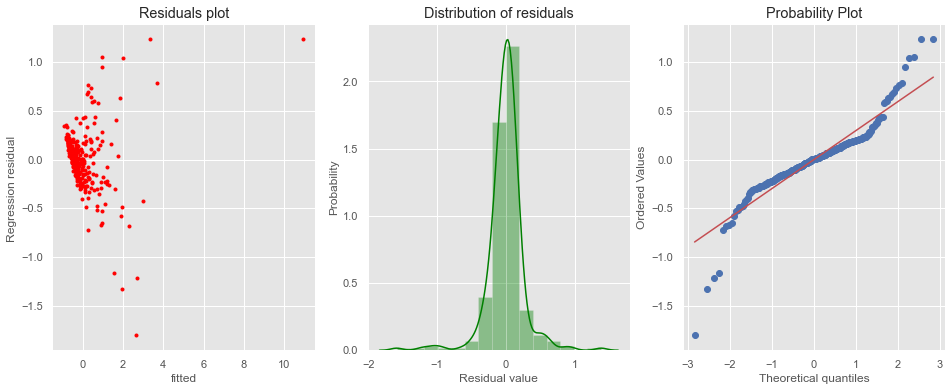

In [168]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))
ax1.plot(lm_rfe5.fittedvalues,lm_rfe5.resid, marker = '.', linestyle = 'none', c = 'red')
ax1.set_xlabel('fitted')
ax1.set_ylabel('Regression residual ')
ax1.set_title('Residuals plot')
#Figure 2: Plot of the distribution of the residuals
ax2 = sns.distplot(lm_rfe1.resid,ax = ax2, bins = 15, color = 'green')
ax2.set_ylabel('Probability')
ax2.set_xlabel('Residual value')
ax2.set_title('Distribution of residuals')

##
ax3 = stats.probplot(lm_rfe5.resid, dist = "norm", plot = plt)
plt.show()

*Dropping `x7` beacuse its `VIF` is `19.4200` and we want VIF less than 5 and hence rebuilding the model*

In [169]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe6 = X_train_rfe5.drop('x7', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe6c = sm.add_constant(X_train_rfe6)
lm_rfe6 = sm.OLS(y_train, X_train_rfe6c).fit()

#Summary of linear model
print(lm_rfe6.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     599.6
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          5.64e-142
Time:                        04:18:10   Log-Likelihood:                -98.571
No. Observations:                 306   AIC:                             207.1
Df Residuals:                     301   BIC:                             225.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.019   1.44e-15      1.0

In [170]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,x8,3.7900
2,x14,3.7800
0,x5,1.0100
3,x15,1.0100


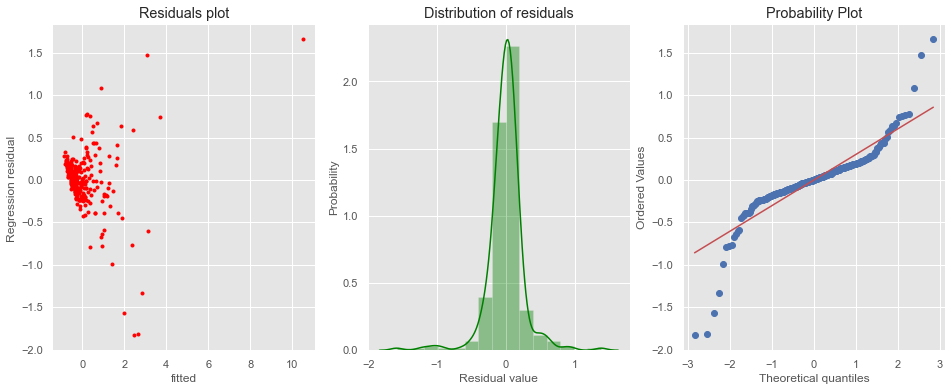

In [171]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))
ax1.plot(lm_rfe6.fittedvalues,lm_rfe6.resid, marker = '.', linestyle = 'none', c = 'red')
ax1.set_xlabel('fitted')
ax1.set_ylabel('Regression residual ')
ax1.set_title('Residuals plot')
#Figure 2: Plot of the distribution of the residuals
ax2 = sns.distplot(lm_rfe1.resid,ax = ax2, bins = 15, color = 'green')
ax2.set_ylabel('Probability')
ax2.set_xlabel('Residual value')
ax2.set_title('Distribution of residuals')

##
ax3 = stats.probplot(lm_rfe6.resid, dist = "norm", plot = plt)
plt.show()

Lets drop `x5` and see if there is any drastic fall in R squared.If not we can drop `x5`.
Our aim is to explain the maximum variance with minimum variable.

In [172]:
# Dropping highly correlated variables and insignificant variables

X_train_rfe7 = X_train_rfe6.drop('x5', 1,)

# Adding a constant variable and Build a sixth fitted model
X_train_rfe7c = sm.add_constant(X_train_rfe7)
lm_rfe7 = sm.OLS(y_train, X_train_rfe7c).fit()

#Summary of linear model
print(lm_rfe7.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     782.8
Date:                Wed, 26 Apr 2023   Prob (F-statistic):          4.80e-142
Time:                        04:18:10   Log-Likelihood:                -101.88
No. Observations:                 306   AIC:                             211.8
Df Residuals:                     302   BIC:                             226.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.776e-17      0.019   1.43e-15      1.0

In [173]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,x14,3.7900
2,x15,3.7800
0,x8,1.0100


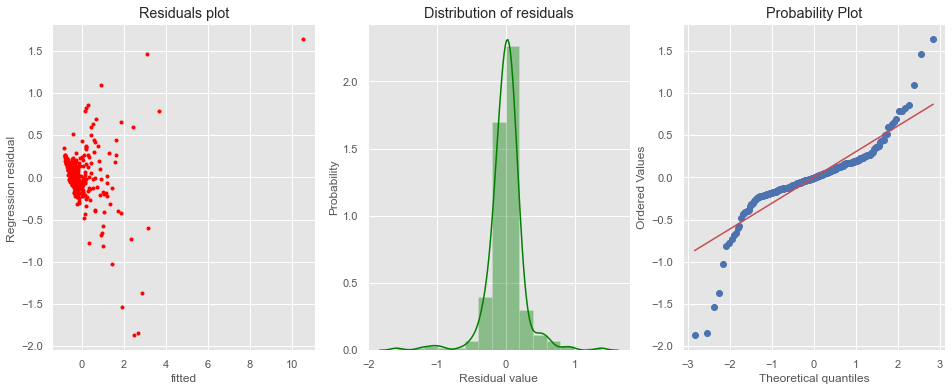

In [174]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,6))
ax1.plot(lm_rfe7.fittedvalues,lm_rfe7.resid, marker = '.', linestyle = 'none', c = 'red')
ax1.set_xlabel('fitted')
ax1.set_ylabel('Regression residual ')
ax1.set_title('Residuals plot')
#Figure 2: Plot of the distribution of the residuals
ax2 = sns.distplot(lm_rfe1.resid,ax = ax2, bins = 15, color = 'green')
ax2.set_ylabel('Probability')
ax2.set_xlabel('Residual value')
ax2.set_title('Distribution of residuals')

##
ax3 = stats.probplot(lm_rfe7.resid, dist = "norm", plot = plt)
plt.show()

Now the VIFs and p-values both are within an acceptable range. So we can go ahead and make our predictions using model `lm_rfe6` and `lm_rfe7`.

### Here, we are proposing Business 2 Models which can be used to predict `y`

## MODEL I
- With `lm_rfe7` which has basically 3 predictor variables.

<a id="7"></a> <br>
## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

In [175]:
# Predicting value y of training set.
y_train_value1 = lm_rfe7.predict(X_train_rfe7c)

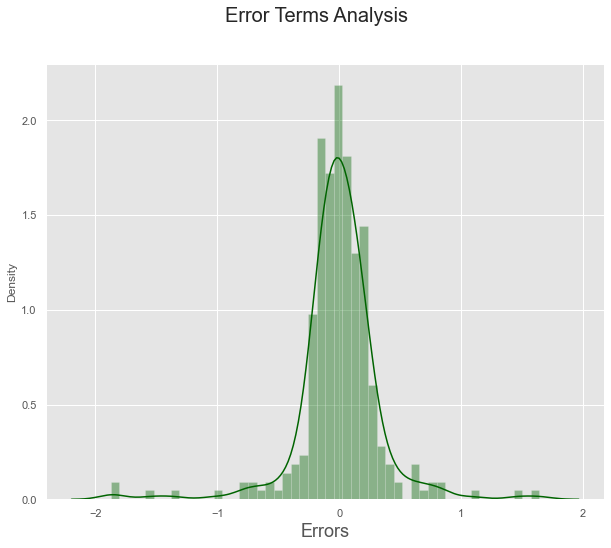

In [176]:
# Plot the histogram of the error terms
fig = plt.figure(figsize = (10, 8))
sns.distplot((y_train - y_train_value1), bins = 50, color = 'darkgreen')
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)
plt.show()

<a id="8"></a> <br>
## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Dividing test set into X_test and y_test

In [177]:
# Adding constant
X_test_1 = sm.add_constant(X_test)

X_test_new = X_test_1[X_train_rfe7c.columns]

In [178]:
# Making predictions using the final model
y_pred = lm_rfe7.predict(X_test_new)

<a id="9"></a> <br>
## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

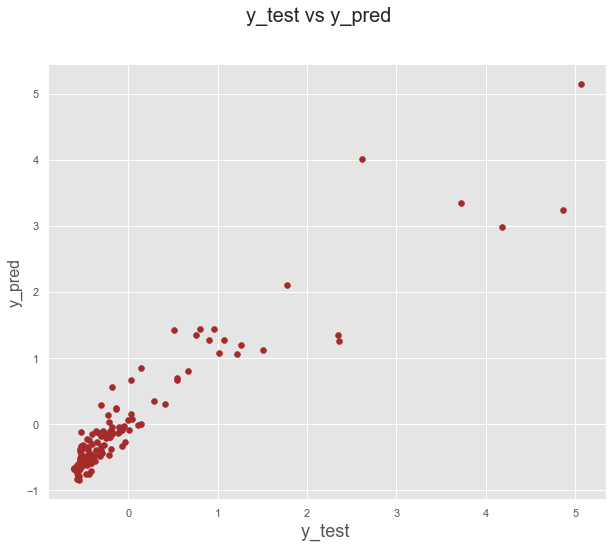

In [179]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize = (10, 8))
plt.scatter(y_test,y_pred, color = 'brown')
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)   
plt.show()

### RMSE Score

In [180]:
r2_score(y_test, y_pred)

0.8847969429029752

**The R2 score of Training set is 0.886 and Test set is 0.852 which is quite close.
Hence, We can say that our model is good enough to predict the y-value using below predictor variables**
- x8
- x14
- x15

#### Equation of Line to predict for `y` value
$ y = 0.4833*x8 + 0.4901*x14 + 0.1729*x15 $

#### Model I Conclusions:
- R-sqaured and Adjusted R-squared - 0.886 and 0.885 - 88% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 782.8 and 4.80e-142(approx. 0.0) - Model fit is significant and explained 90%<br> variance is just not by chance.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the <br>predictors are statistically significant.

## MODEL II
- With `lm_rfe6` which has basically 4 predictor variables.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of it.

In [181]:
# Predicting y of training set.
y_train_value2 = lm_rfe6.predict(X_train_rfe6c)

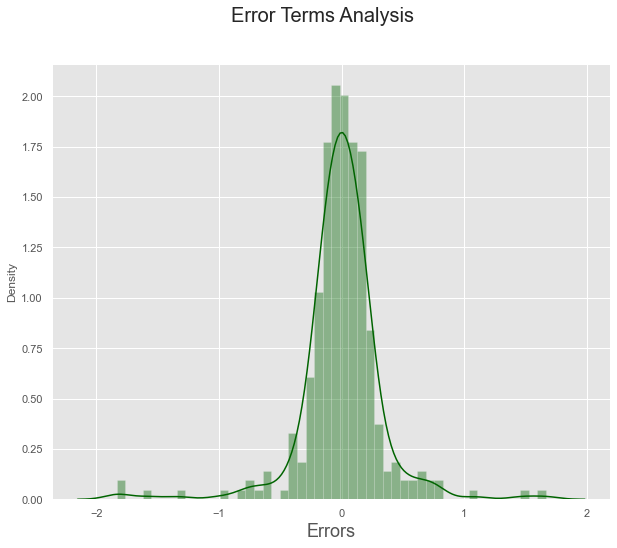

In [182]:
# Plot the histogram of the error terms
fig = plt.figure(figsize = (10, 8))
sns.distplot((y_train - y_train_value2), bins = 50, color = 'darkgreen')
fig.suptitle('Error Terms Analysis', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)
plt.show()

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the model.

In [183]:
X_test_2 = X_test_1[X_train_rfe6c.columns]

In [184]:
# Making predictions using the final model
y_pred2 = lm_rfe6.predict(X_test_2)

Text(0, 0.5, 'y_pred')

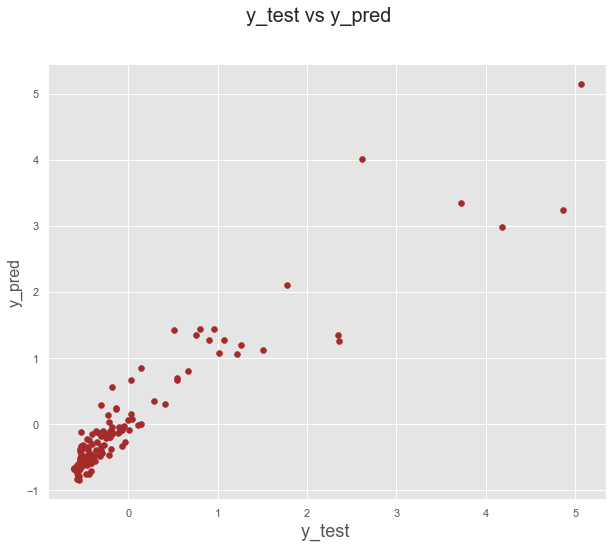

In [185]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure(figsize = (10, 8))
plt.scatter(y_test,y_pred, color = 'brown')
fig.suptitle('y_test vs y_pred', fontsize=20)   
plt.xlabel('y_test ', fontsize=18)                       
plt.ylabel('y_pred', fontsize=16)    

### RMSE Score

In [186]:
r2_score(y_test, y_pred2)

0.8850482874397199

**The R2 score of Training set is 0.888 and Test set is 0.882 which is quite close.
Hence, We can say that our model is good enough to predict the y-value using below predictor variables**
- x5
- x8
- x14
- x15

#### Equation of Line to predict for `y` value
$ y = 0.0496*x5 + 0.4825*x8 + 0.4879*x14 + 0.1693*x15 $

#### Model I Conclusions:
- R-sqaured and Adjusted R-squared - 0.888 and 0.852 - 88% variance explained.
- F-stats and Prob(F-stats) (overall model fit) - 599.6 and 5.64e-142(approx. 0.0) - Model fit is significant and explained 90%<br> variance is just not by chance.
- p-values - p-values for all the coefficients seem to be less than the significance level of 0.05. - meaning that all the <br>predictors are statistically significant.

### Conclusion:
* Both the models are good enough to predict y-value which explains the variance of data upto 90% and the model is significant.

## Closing Statement:
Both the Forward (Manual and Computerised) and Backward approaches are good enough to forecast y-values that explain up to 90% of the variation in data, and the model is significant. We received the same single model with three variables from both manual and computerised forward.  As a result, we obtained one model in the forward technique and two models in the backward way. 
